# Tarea N°01

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Gonzalo Adrián Gacitúa Hernández

* __Rol__: 201551544-1

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scriptsm, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.-  Imagenception

Desde [Wikipedia](https://es.wikipedia.org/wiki/RGB), __RGB__ (sigla en inglés de red, green, blue) es un modelo de color basado en la síntesis aditiva, con el que es posible representar un color mediante la mezcla por adición de los tres colores de luz primarios. El modelo de color RGB no define por sí mismo lo que significa exactamente rojo, verde o azul, por lo que los mismos valores RGB pueden mostrar colores notablemente diferentes en distintos dispositivos que usen este modelo de color. Aunque utilicen un mismo modelo de color, sus espacios de color pueden variar considerablemente.

Para indicar con qué proporción es mezclado cada color, se asigna un valor a cada uno de los colores primarios, de manera que el valor "0" significa que no interviene en la mezcla y, a medida que ese valor aumenta, se entiende que aporta más intensidad a la mezcla. Aunque el intervalo de valores podría ser cualquiera (valores reales entre 0 y 1, valores enteros entre 0 y 37, etc.), es frecuente que cada color primario se codifique con un byte (8 bits).

Así, de manera usual, la intensidad de cada una de las componentes se mide según una escala que va del 0 al 255 y cada color es definido por un conjunto de valores escritos entre paréntesis (correspondientes a valores "R", "G" y "B") y separados por comas.

El conjunto de todos los colores también se puede representar en forma de cubo. Cada color es un punto de la superficie o del interior de éste. La escala de grises estaría situada en la diagonal que une al color blanco con el negro.

![rgb](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Avl3119color4a.svg/800px-Avl3119color4a.svg.png)

Para efectos prácticos del curso, es posible representar cada pixel de una imagen con un array de 3 dimensiones, cada valor representa a una de las capas RGB. Por lo tanto, una imagen de $n \times m$ pixeles se representa como un arreglo de dimension $(n, m , 3)$ En `Python` una de las librerías de procesamiento de imágenes más utilizada es `Pillow`.

Abrir una imagen es tan fácil como:

In [1]:
# librerias

import os
import numpy as np
from PIL import Image

In [2]:
gatito = Image.open(os.path.join("images", "gatito.png"))

Notar que la variable anterior es de una clase específica de la librería.

In [3]:
type(gatito)

PIL.PngImagePlugin.PngImageFile

Para ver la imagen en Jupyter puedes utilizar la misma técnica que con los `pd.DataFrames`, es decir:

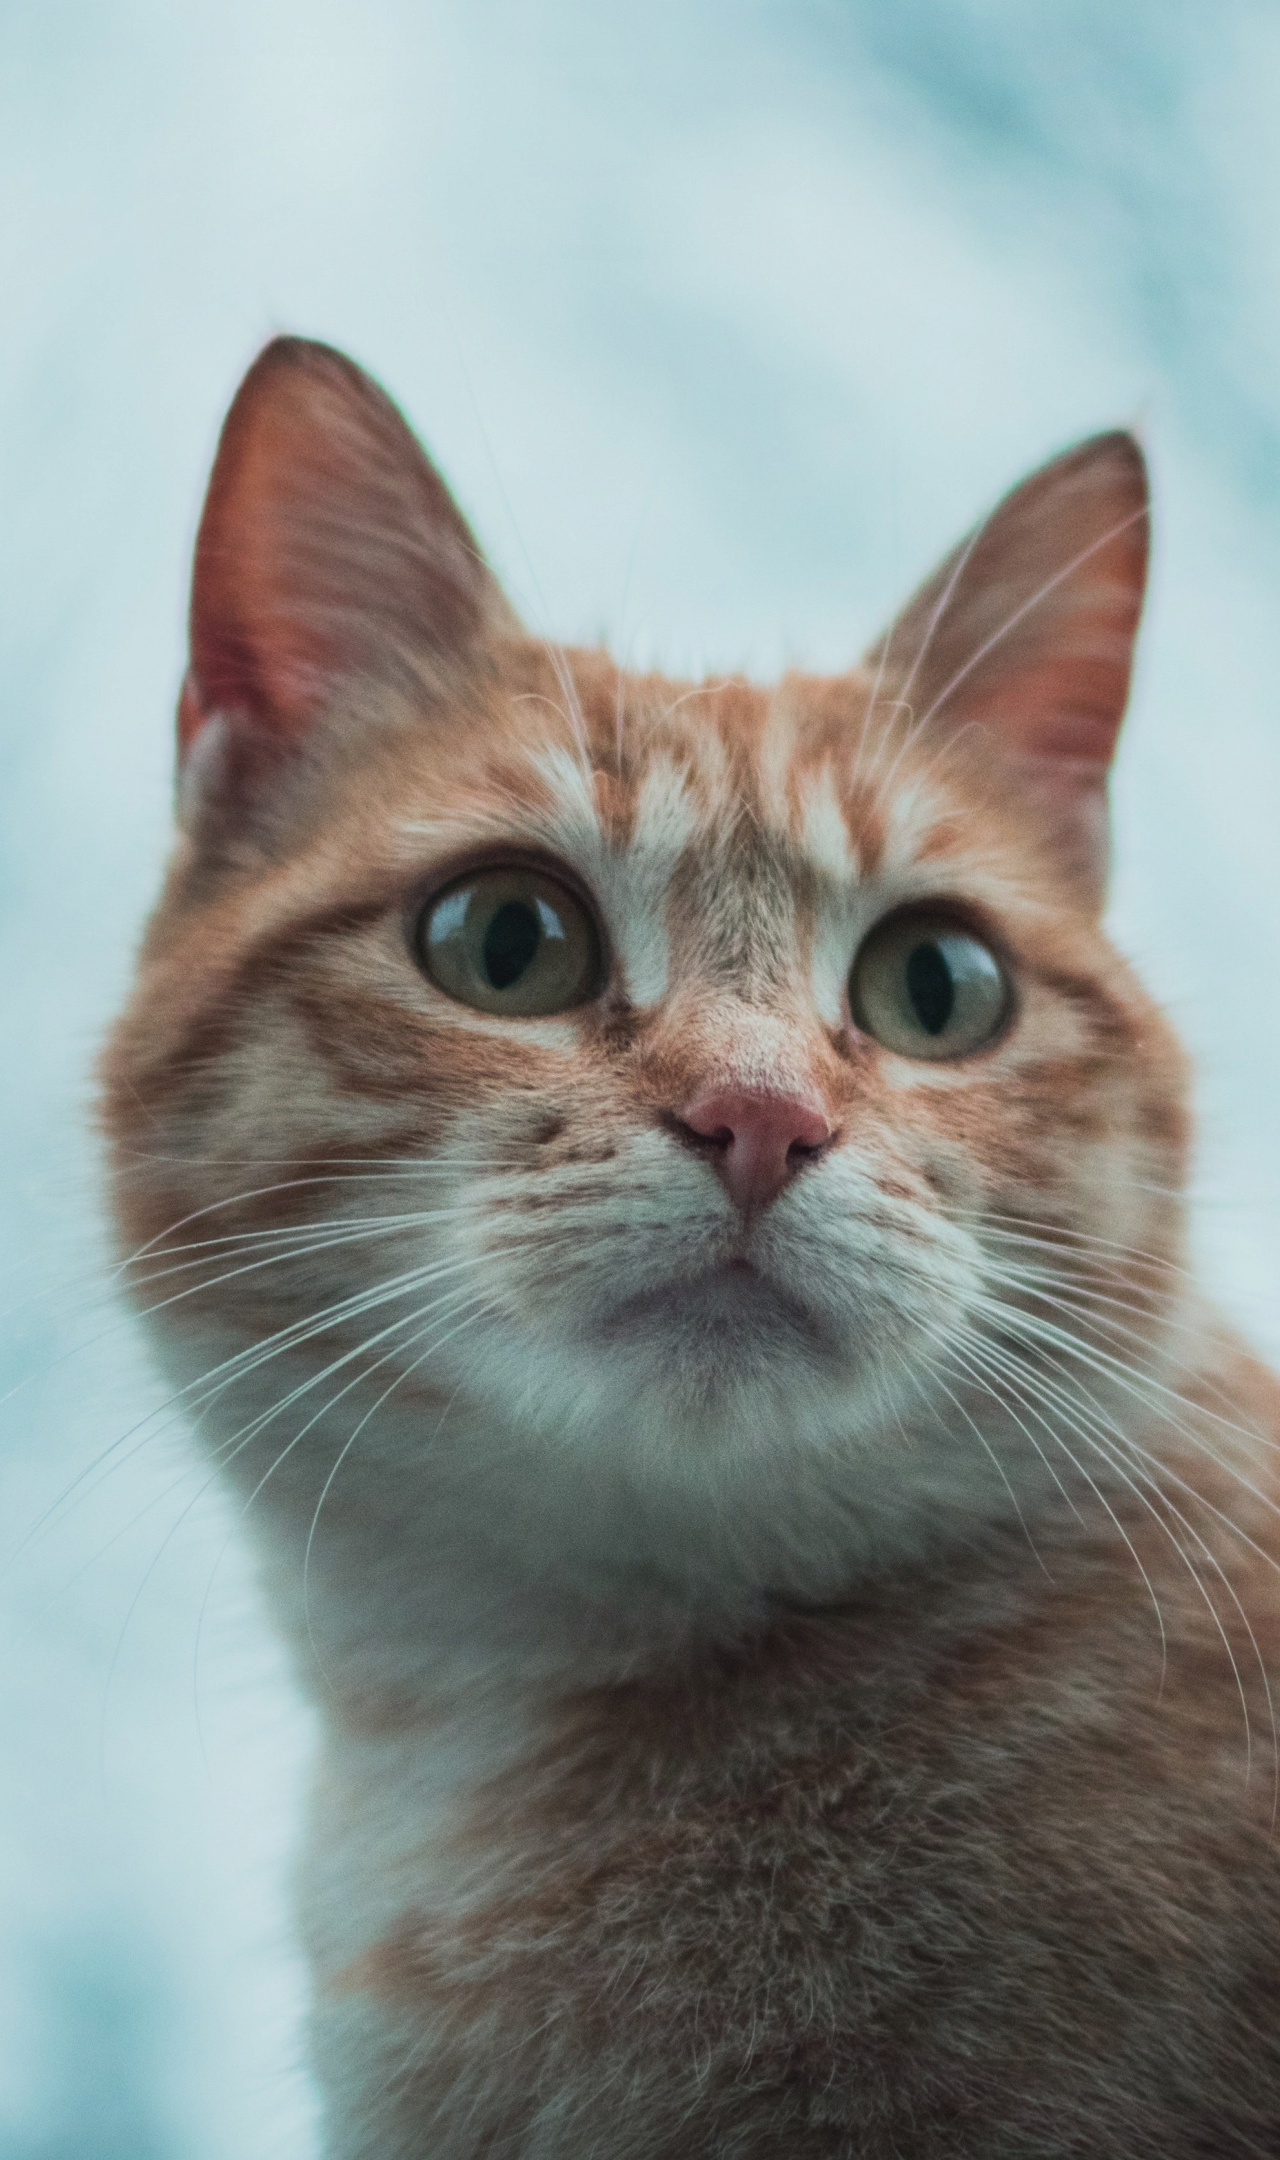

In [4]:
gatito

Para tener su representación en un array podemos utilizar el constructor `np.array` con argumento la imagen.

In [5]:
gatito_np = np.array(gatito)
print(f"Dimension de la imagen gatito: {gatito_np.shape}.\n")
print(f"Al convertir a np.ndarry el tipo de elementos es {gatito_np.dtype}.\n")
print(gatito_np)

Dimension de la imagen gatito: (2160, 1280, 3).

Al convertir a np.ndarry el tipo de elementos es uint8.

[[[179 211 215]
  [179 211 215]
  [179 209 215]
  ...
  [171 201 209]
  [171 201 209]
  [169 199 207]]

 [[181 213 217]
  [181 213 217]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [171 201 209]]

 [[179 211 215]
  [179 211 215]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [173 203 211]]

 ...

 [[125 179 190]
  [123 177 188]
  [129 183 194]
  ...
  [ 41  36  33]
  [ 43  38  35]
  [ 45  40  37]]

 [[127 181 192]
  [125 179 190]
  [127 181 192]
  ...
  [ 43  38  37]
  [ 43  38  37]
  [ 45  40  37]]

 [[125 179 190]
  [123 177 188]
  [123 177 188]
  ...
  [ 49  44  43]
  [ 45  40  37]
  [ 43  38  35]]]


### 1.- Encontrando la imagen oculta

La imagen anterior tiene una imagen oculta, el ejercicio corresponde en descifrarlo. Las instrucciones son las siguientes:

1.1 Crear una lista vacía declarada como `secret_list`.

In [6]:
secret_list = []

1.2 Iterar por cada uno de los canales RGB (`gatito_np.shape[2]`) y en cada iteración:
 * Crear un arreglo temporal llamado `secret_aux` de dos dimensiones, de la misma dimension de pixeles de la imagen `gatito` y que tenga valores enteros, `0` si el valor de la capa de `gatito_np` es par y `1` si es impar. 
  - No iterar por filas y columnas.
  - Utilizar la operación módulo `%`. 
  - En la i-ésima iteración de los canales la capa de `gatito_np` es `gatito_np[:, :, i]`.
        
        
 * Escalar `secret_aux` a valores 0 y 255.
    
 * Cambiar el `dtype` de `secret_aux` a `np.uint8` (utilize el méteodo `astype()`).
            
 * Agregue `secret_aux` a `secret_list`.
    
Al final de la iteración `secret_list` debe tener solo tres arreglos.

**Observación:** recuerde que puede aplicar operaciones directo a un arreglo de numpy.

In [7]:
for channel in range(gatito_np.shape[2]): #Se itera sobre los canales
    secret_aux = np.zeros((gatito_np.shape[0],gatito_np.shape[1])) #se crea el arreglo de dos dimensiones 
                                                                    #con la misma dimension que los pixeles de la imagen
    secret_aux = (gatito_np[:,:,channel]%2)*255 #se reescala secret_aux segun el C_2 (clases de 0 y 1)
    secret_aux = secret_aux.astype(np.uint8) # cambio de dtype
    secret_list.append(secret_aux)

In [8]:
print(f"secret_list tiene {len(secret_list)} elementos")

secret_list tiene 3 elementos


1.3 Crear la variable `secret_np` concatenando horizontalmente los elementos de `secret_list`.

In [9]:
secret_np = np.concatenate(secret_list, axis=1) # se concatena horizontalmente la secret_list con el axis=1
secret_np.shape

(2160, 3840)

1.4 Crear el objeto `secret_img` utilizando el arreglo `secret_np`, asegurar que los valores estén entre 0 y 255, y que el dtype sea `np.uint8`, con el método `Image.fromarray` con argumento `mode="L"`

In [10]:
np.unique(secret_np)

array([  0, 255], dtype=uint8)

In [11]:
secret_np.dtype

dtype('uint8')

In [12]:
secret_img = Image.fromarray(secret_np) #aqui se pone el arreglo que nos interesa decodificar

Ahora puedes ver el resultado!

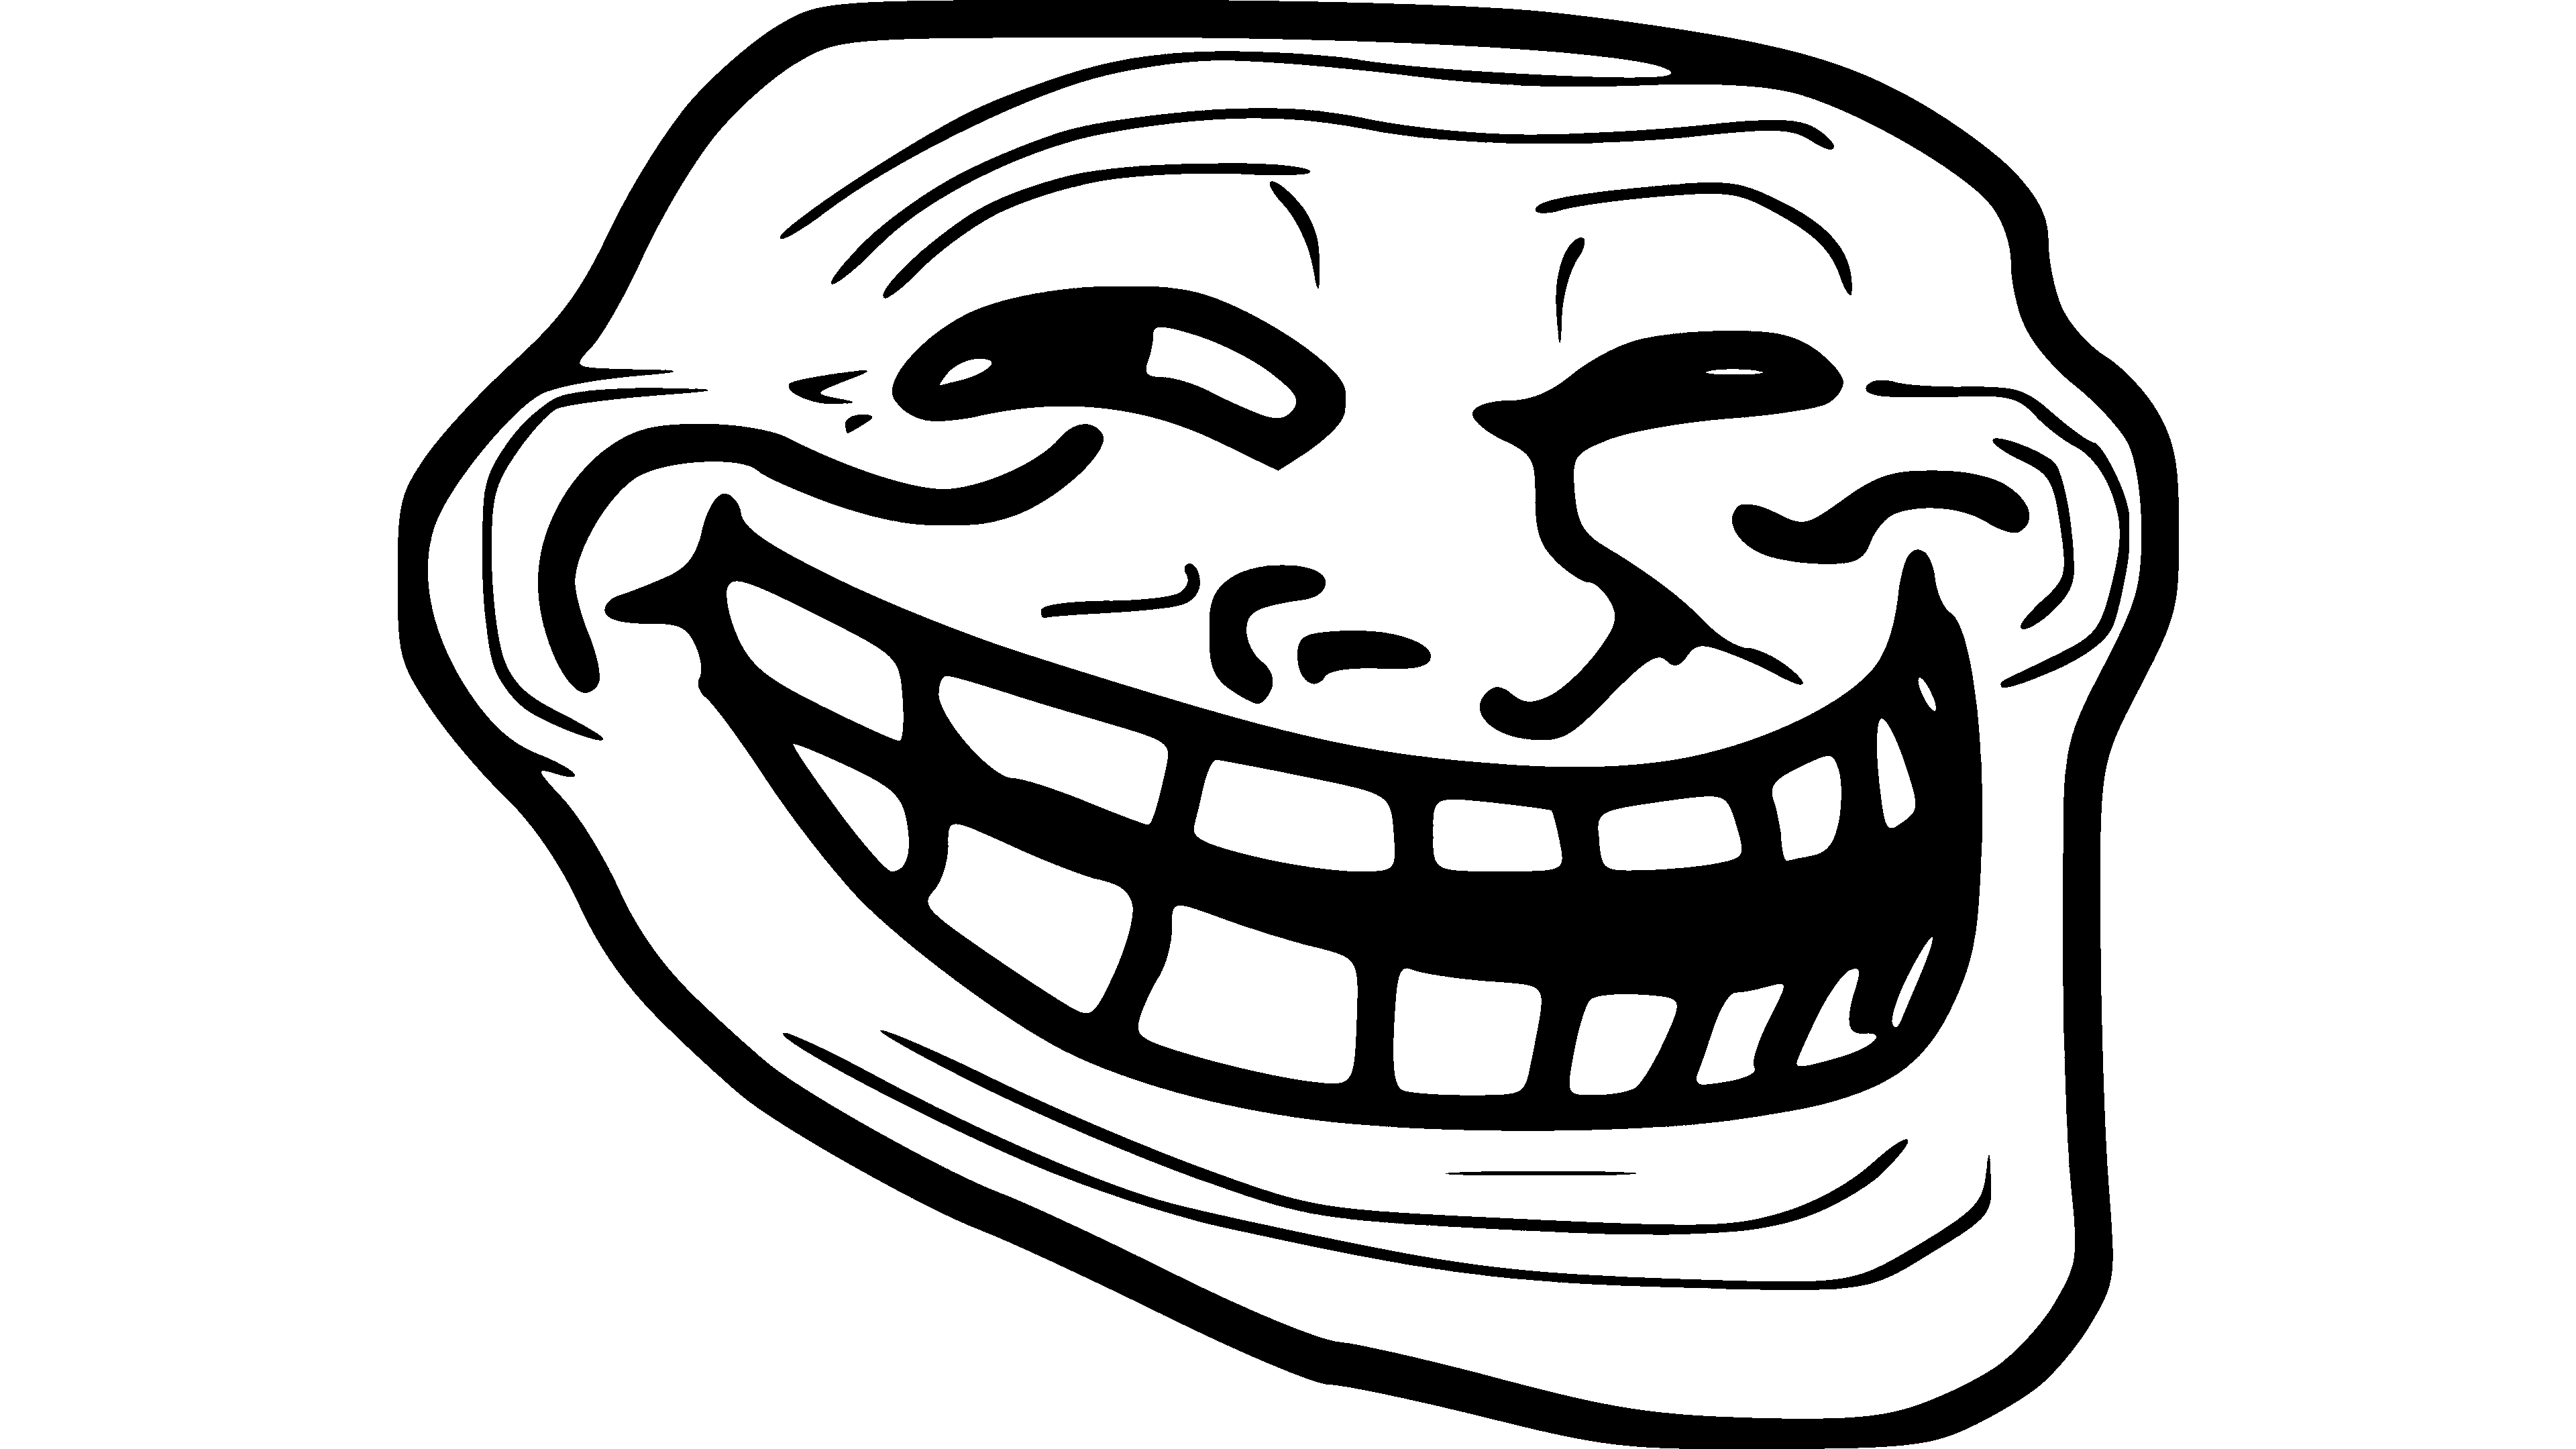

In [13]:
secret_img

### 2.- Escondiendo una nueva imagen

Es tu turno, ahora tu esconderás una imagen. Las instrucciones son las siguientes:

2.1 Selecciona una imagen de 2160 x 3840 pixeles (a.k.a resolución 4k), lo importante es que sea solo en blanco y negro, en la carpeta `images` se disponibiliza como ejemplo la imagen `black_and_white_example.jpg` y crea una variable llamada `my_img` leyendo la imagen seleccionada con `Image.open()`.

In [14]:
my_img = Image.open(os.path.join("images", "black_and_white_example.jpg"))

2.2 Crea un arreglo llamado `my_img_np` utilizando `my_img` y el método `np.array()`.
    * Es importante que `my_img_np.shape` sea `(2160, 3840)`, es decir, que solo sea de dos dimensiones. Esto porque es una imagen en blanco y negro, no necesitando el modelo RGB.

In [15]:
my_img_np = np.array(my_img)
print(my_img_np.shape)

(2160, 3840)


2.3 Crear la variable `my_img_np_aux` utilizando un _umbral_ con tal de que:
    - 1: Si el valor del pixel es mayor  al _umbral_.
    - 0: Si el valor del pixel es menor o igual al _umbral_.
    - El `dtype` debe ser `np.uint8`.
    - Para `black_and_white_example.jpg` un umbral adecuado es `20`.

In [16]:
umbral = 40
my_img_np_aux = my_img_np #se crea la copia del array para no intervenirlo innecesariamente
my_img_np_aux[my_img_np_aux>umbral]=1 #si alguno de los elementos del array supera el umbral, se le asigna 1.
                                        #dejé 40 solo probando números
my_img_np_aux


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Puedes probar que tan bien quedó la imagen con la siguiente linea. Si crees que no se ve bien, puedes cambiar el _umbral_.

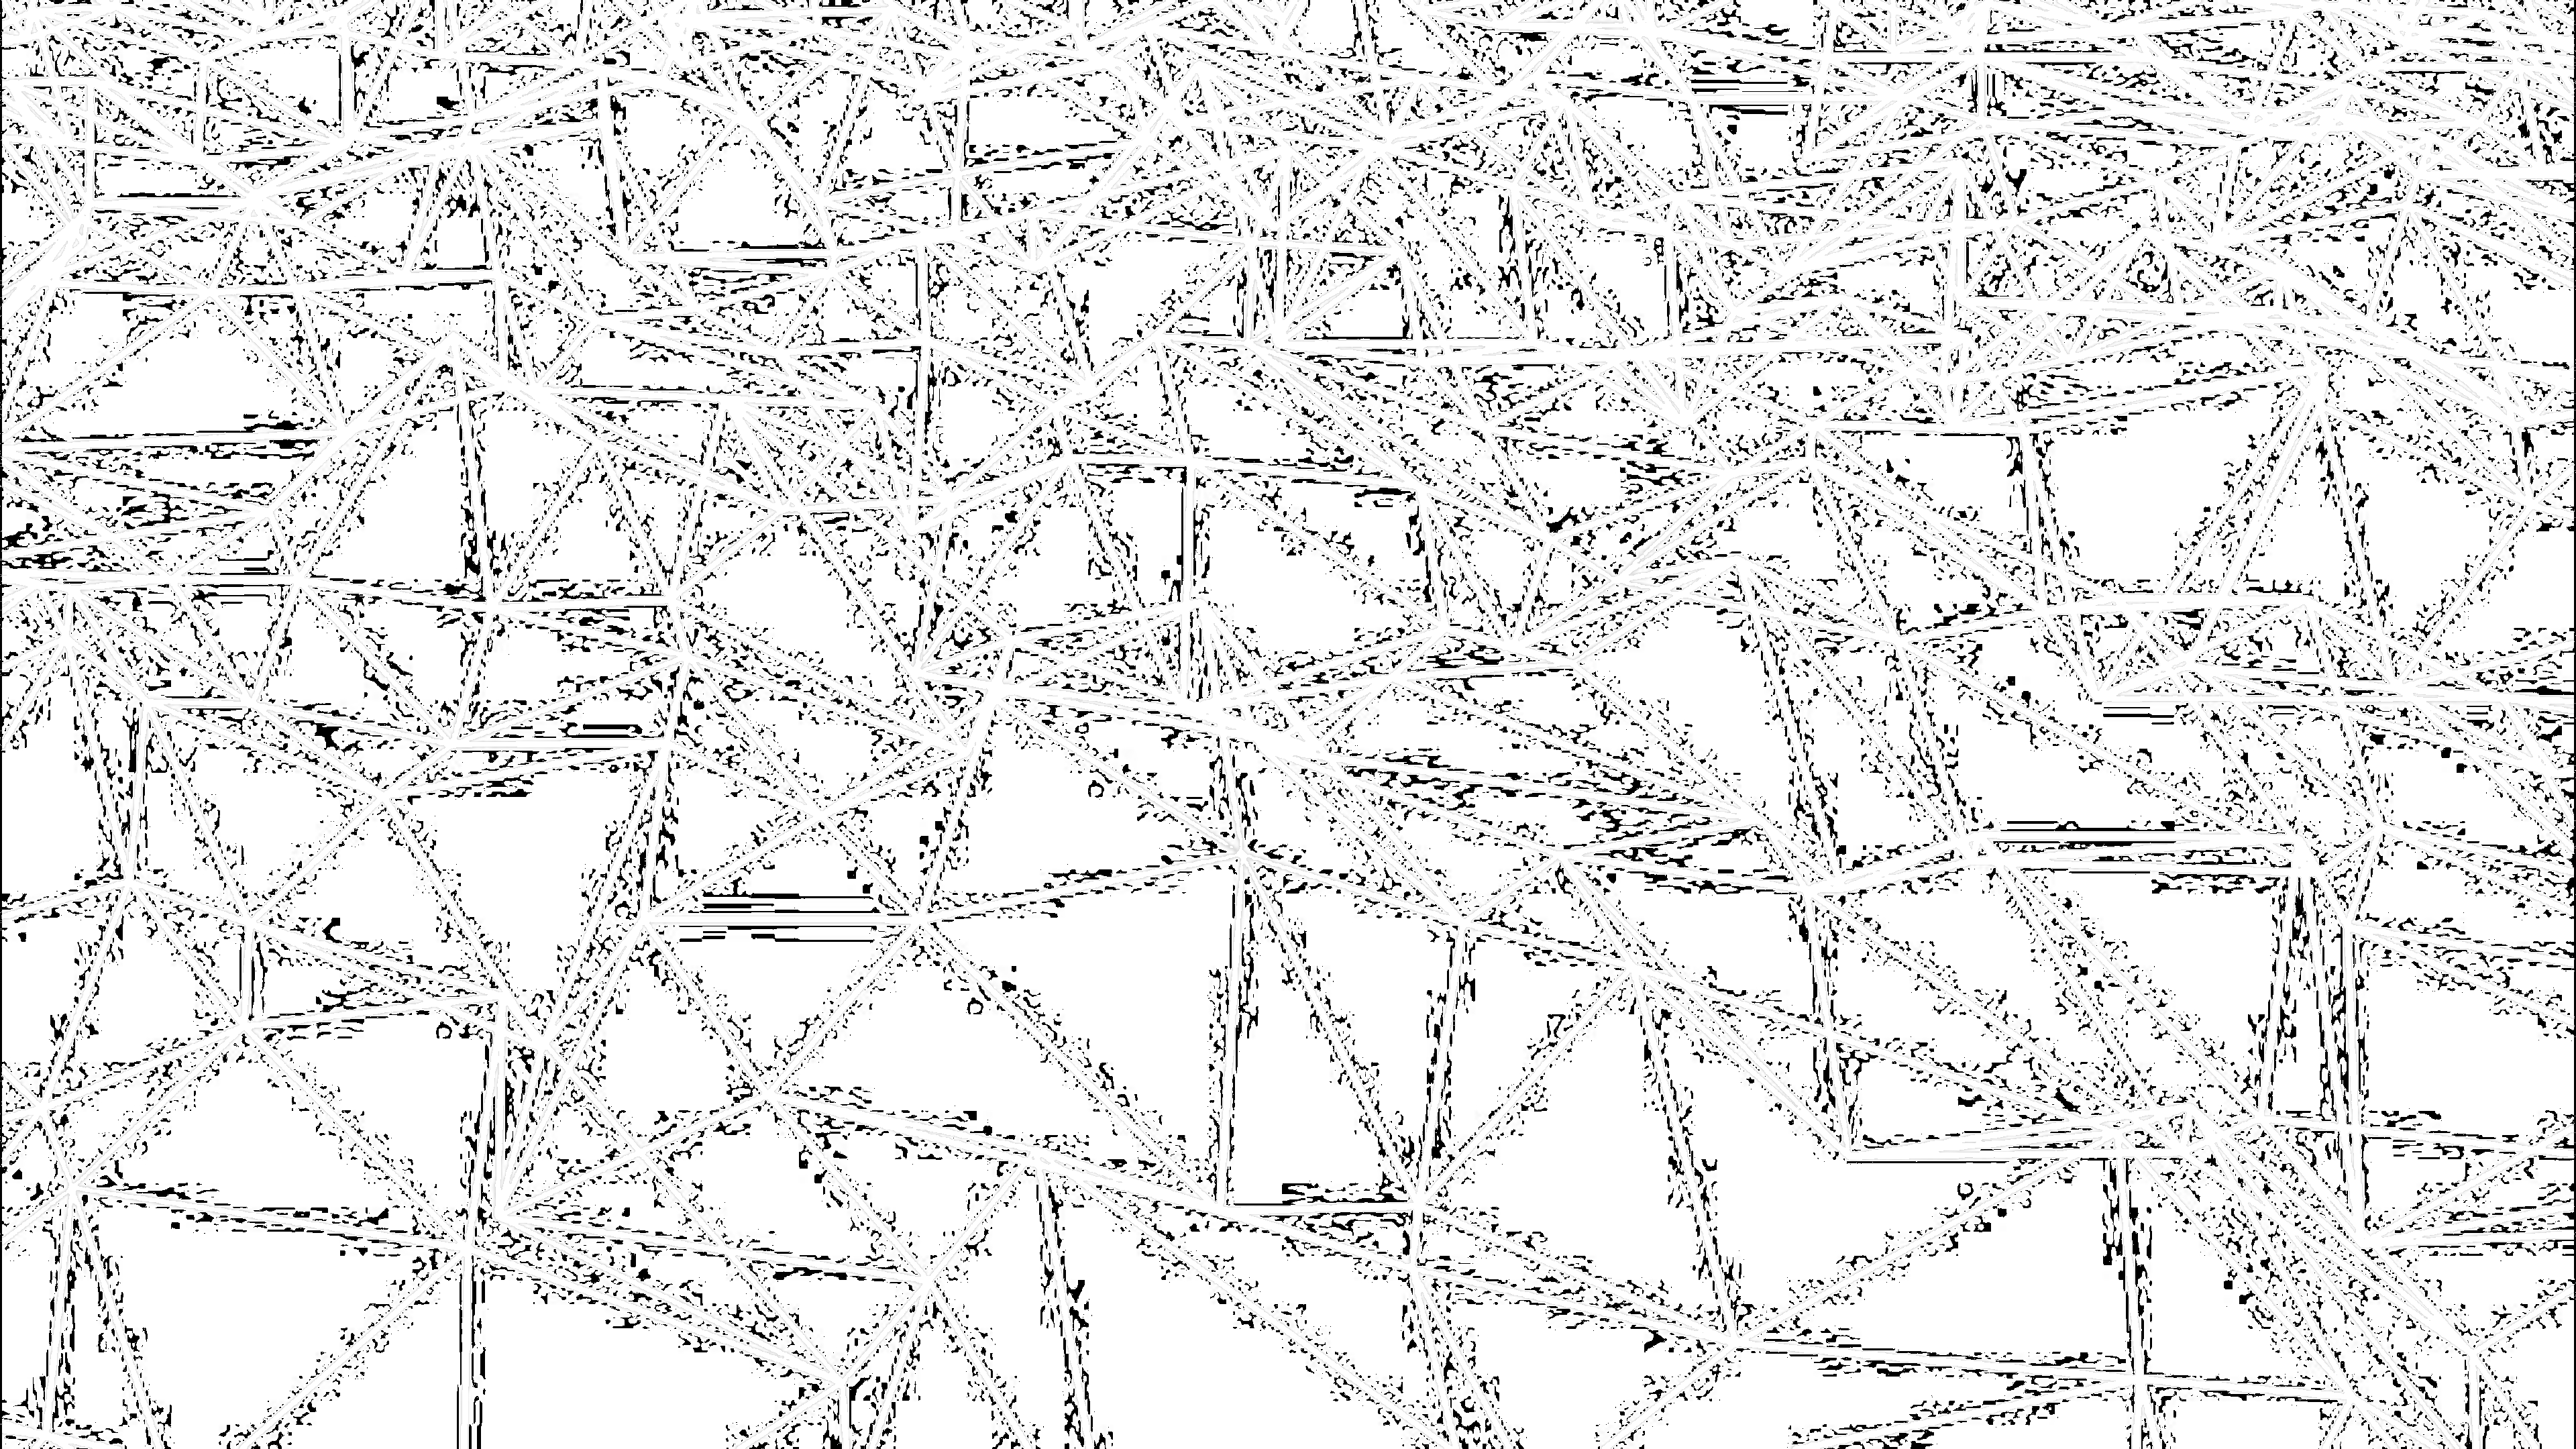

In [17]:
Image.fromarray(my_img_np_aux * 255)

2.4 Dividir la imagen en tres arreglos de tamaño (2160, 1280) y guardarlos en una lista con el nombre `my_img_split`. Hint: Revisa en la documentación de `numpy`.

In [18]:
my_img_split = np.split(my_img_np_aux, 3, axis=1) #ahí se divide en 3 el auxiliar que es el que estabamos operando

Revisa utilizando la siguiente iteración.

In [19]:
for img_array in my_img_split:
    print(img_array.shape)

(2160, 1280)
(2160, 1280)
(2160, 1280)


**Se cumple lo pedido**

2.5 La imagen donde se esconderá tu imagen selecionada está en la carpeta `images` con el nombre `gatito_original.png`, que sospechosamente es de 2160 x 1280 pixeles. Carga la imagen en la variable `cat` y luego crea arreglo `cat_np` utilizando `cat`. Verifica que `cat_np.shape = (2160, 1280, 3)`.

In [20]:
cat = Image.open(os.path.join("images", "gatito_original.png"))
cat_np = np.array(cat)
print(cat_np.shape)

(2160, 1280, 3)


2.6 Convierte todos los valores de `cat_np` a valores pares. Esto lo puedes hacer sumando 1 a cada valor de arreglo si es impar

In [21]:
cat_np [(cat_np%2)==1]+=1 #aca se hace: si el modulo 2 es 1 se le suma 1, para que sea par.
np.unique(cat_np%2)

array([0], dtype=uint8)

2.7 Itera por canal RGB de `cat_np` y en cada capa suma los valores de uno de los arreglos de `my_img_split`.

In [22]:
for channel in range(cat_np.shape[2]):
    cat_np[:,:,channel] += my_img_split[channel] #se itera sobre los canales

2.8 Crea una variable llamada `cat_secret_im` con `Image.fromarray` y la variable `cat_np` (que ya ha sido modificada). Luego guarda la imagen en la carpeta `images` con el nombre `my_secret.png`.

In [23]:
cat_secret_im = Image.fromarray(cat_np)
cat_secret_im.save(os.path.join("images", "my_secret.png"))

2.9 Crea una función llamada `imagenception()` que como argumento tenga la ruta de la imagen que quieres descifrar y que descifre la imagen secreta recientemente creada. Hint: Utiliza todos los pasos de la primera parte. 

In [24]:
def imagenception(filepath):##Recibe una ruta de una imagen y devuelve una imagen oculta que se encuentra en la imagen original
    
    gatito = Image.open(filepath)
    gatito_np = np.array(gatito)
    
    if gatito_np.shape[2]==3 and len(gatito_np.shape)==3: #Se checkea la información en RGB
        
        secret_list = [] ##Se crea la lista vacia ##
        
        for channel in range(gatito_np.shape[2]): #se itera sobre los canales
            secret_aux = np.zeros((gatito_np.shape[0],gatito_np.shape[1])) # arreglo de dos dimensiones con la misma dimension que los pixeles de GATITO
            secret_aux = (gatito_np[:,:,channel]%2)*255 # secret_aux escalado segun el C_2 (clases de 0 y 1)
            secret_aux = secret_aux.astype(np.uint8) # cambio de dtype
            secret_list.append(secret_aux)
            
        secret_np = np.concatenate(secret_list, axis=1) #Se concatena horizontalmente con axis=1
        secret_img = Image.fromarray(secret_np)
        return secret_img
    
    else:
        print("Error: No se está utilizando RGB")
        return False

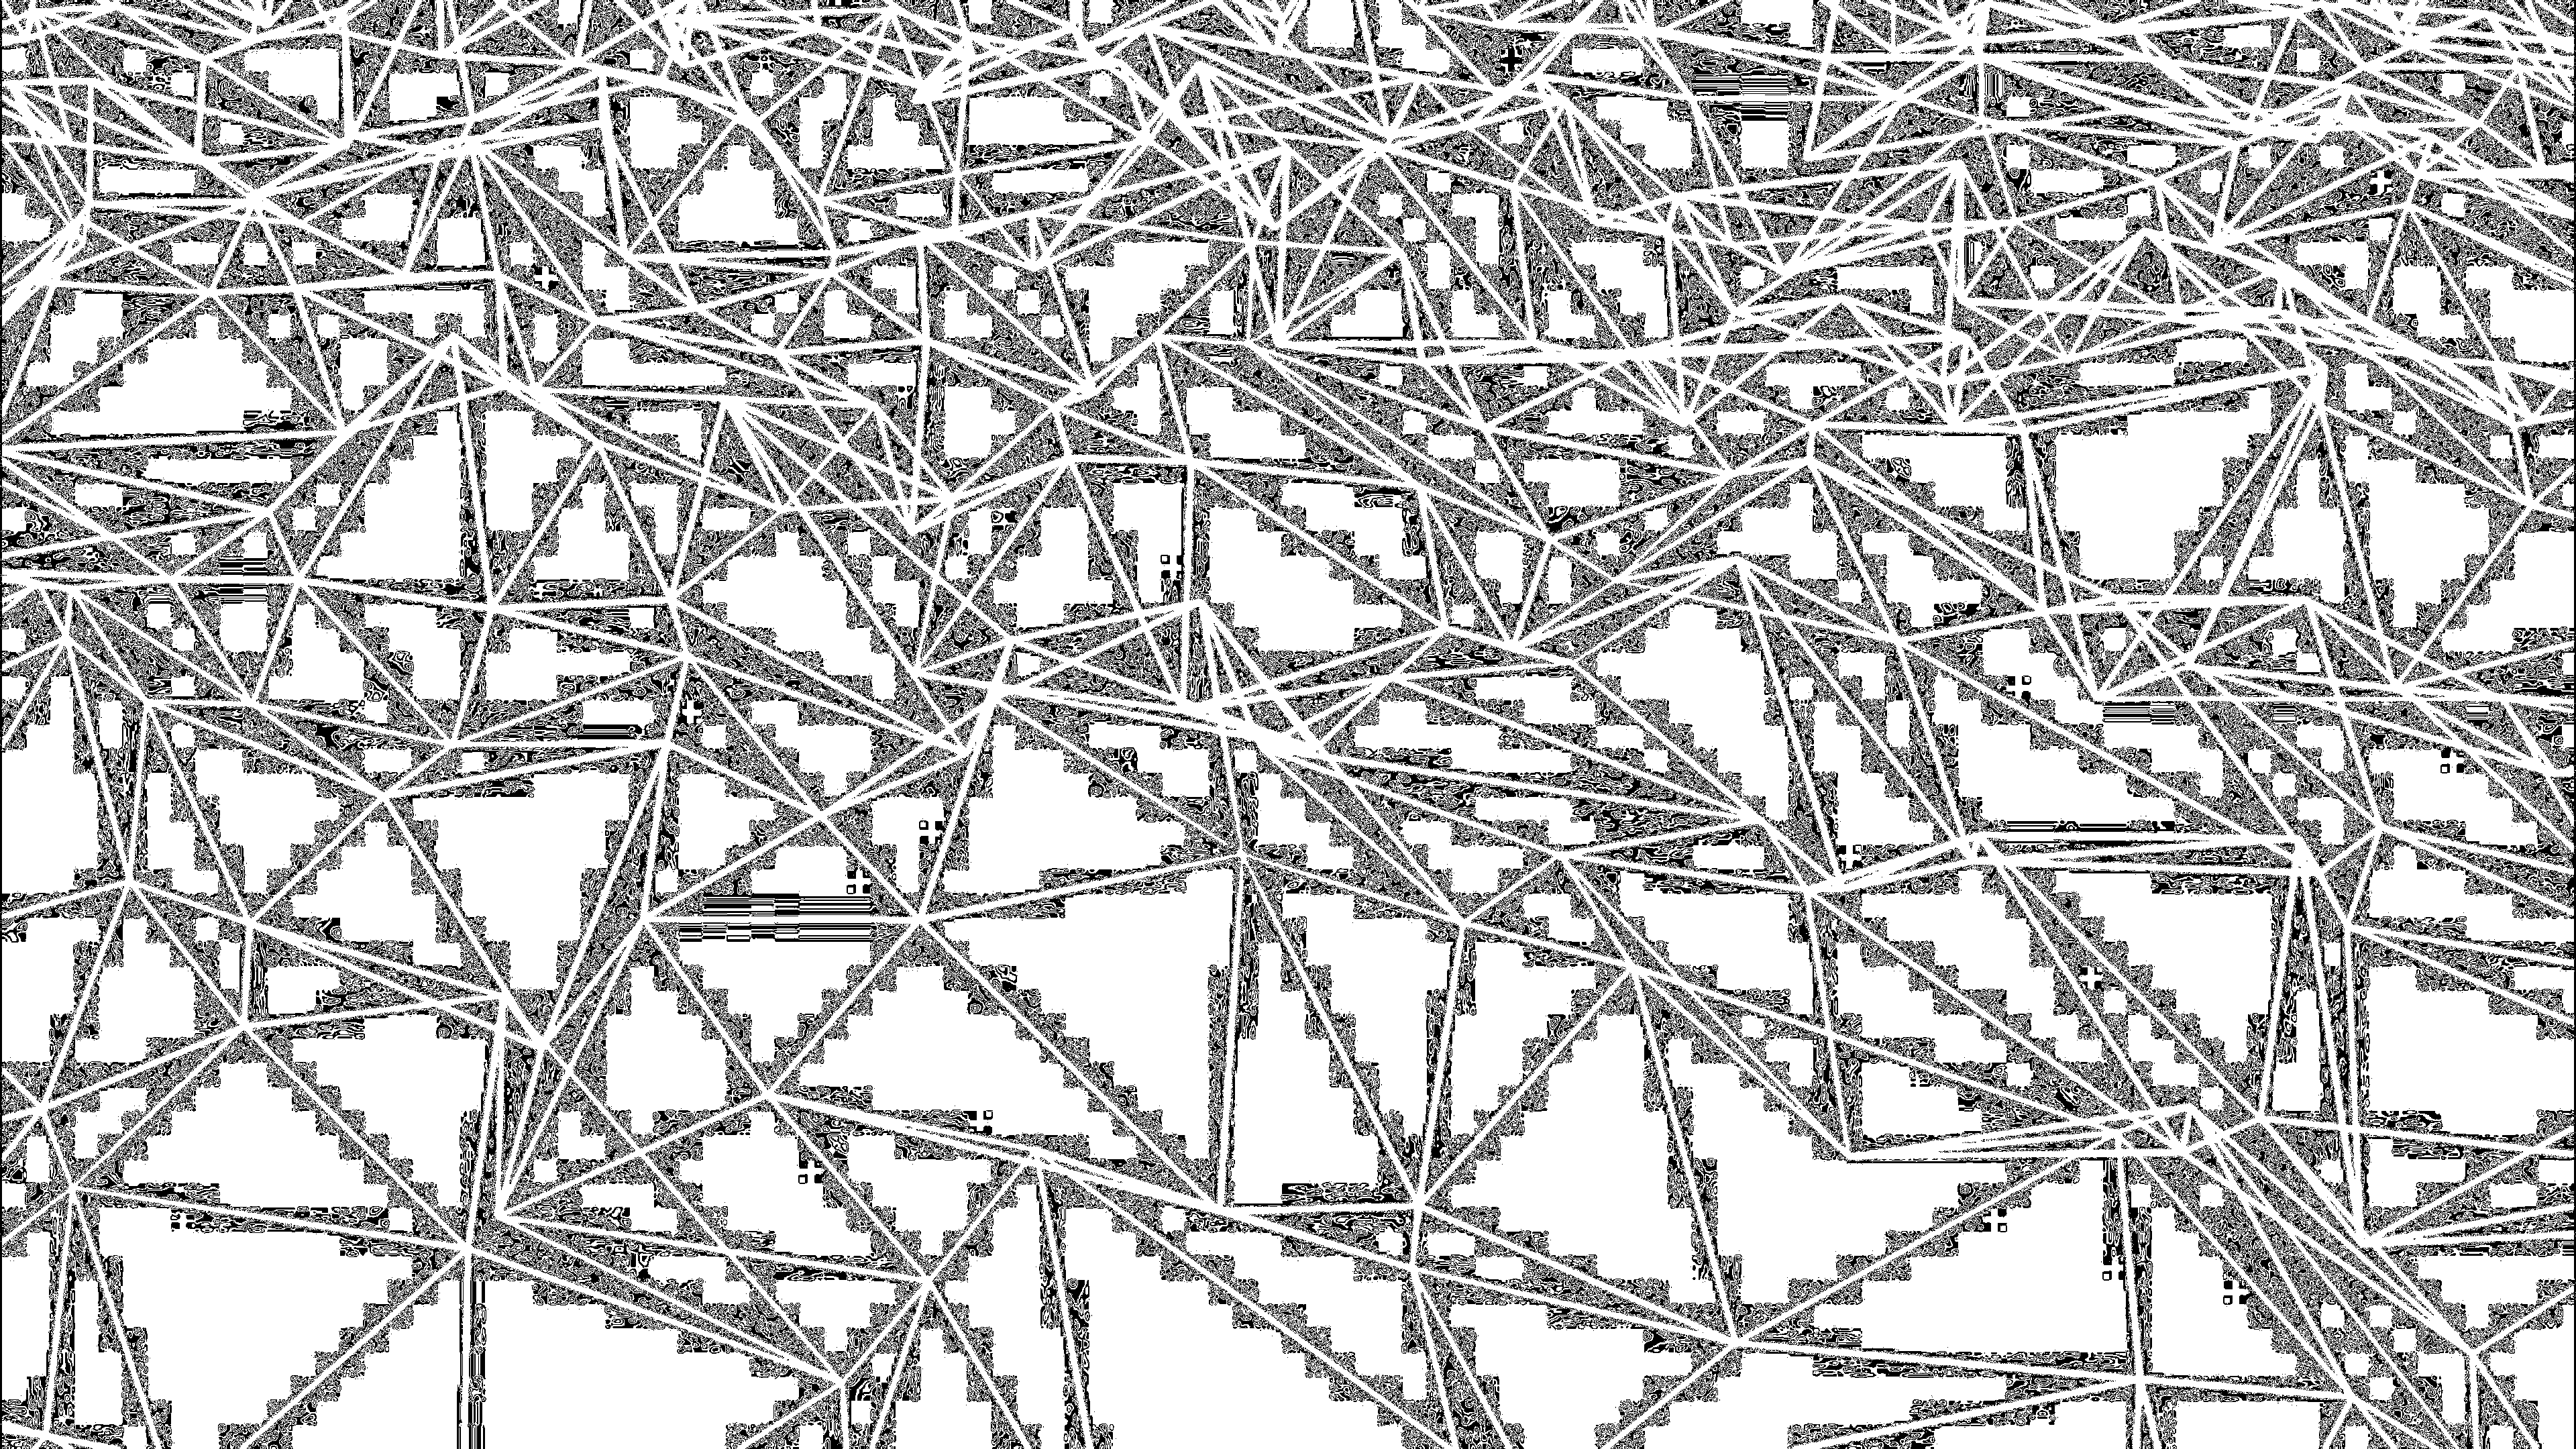

In [25]:
my_secret_img = imagenception(os.path.join("images", "my_secret.png"))
my_secret_img

## II.- Analizando la Felicidad

<img src="https://static01.nyt.com/images/2019/09/29/opinion/sunday/29HolsonStill/29HolsonStill-popup.jpg" width="480" height="360" align="center"/>

Este ejercicio es netamente análisis de datos, tratando de abarcar problemas típicos como la lectura de datos, corrección de errores, métricas agrupadas, unión de datos, etc. Utilizaremos un conjunto de datos llamado __World Happiness Report__ disponible en el siguiente [link](https://www.kaggle.com/unsdsn/world-happiness), de donde se puede obtener información al respecto.

#### Context
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### Content
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.


### 2.1 Lectura de datos

In [26]:
# libraries
import os
import pandas as pd
pd.set_option("display.max_columns", 999)  # Permite mostrar hasta 999 columnas de un DataFrame en Jupyter.

En la carpeta `data/world-happiness` se disponen de tres archivos, uno por cada reporte anual (años 2015, 2016 y 2017). No es de sorprender que envíen un archivo por año (podría ser mensual, semestral, etc.), lo imortante es ser capaces de leer una cantidad __variable__ de archivos al mismo tiempo. Una buena práctica es crear un diccionario de dataframes.

In [27]:
# Comprehension dictionary
df_dict = {
    year: pd.read_csv(os.path.join("data", "world-happiness", f"{year}.csv"))
    for year in [2015, 2016, 2017]
}

Por ejemplo, se puede acceder al DataFrame asociado al archivo `data/world-happiness/2016.csv` de la siguiente manera:

In [28]:
df_dict[2016].head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

Una pequeña descripción de las columnas

* `Country` Name of the country.
* `Region` Region the country belongs to.
* `Happiness Rank` Rank of the country based on the Happiness Score.
* `Happiness Score` A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* `Standard Error` The standard error of the happiness score.
* `Economy (GDP per Capita)` The extent to which GDP contributes to the calculation of the Happiness Score.
* `Family` The extent to which Family contributes to the calculation of the Happiness Score
* `Health (Life Expectancy)` The extent to which Life expectancy contributed to the calculation of the Happiness Score
* `Freedom` The extent to which Freedom contributed to the calculation of the Happiness Score.
* `Trust (Government Corruption)` The extent to which Perception of Corruption contributes to Happiness Score.
* `Generosity` The extent to which Generosity contributed to the calculation of the Happiness Score.
* `Dystopia Residual` The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

Notar que los conjuntos de datos no poseen las mismas columnas, por lo tanto, solo se trabajarán con las columnas en común y posteriormente agregaremos el año con tal de concatenar los tres conjuntos.

In [29]:
from functools import reduce
intersection_columns = reduce(np.intersect1d, [df_i.columns.values for df_i in df_dict.values()]).tolist() + ["Year"]
print(intersection_columns)

['Country', 'Dystopia Residual', 'Economy (GDP per Capita)', 'Family', 'Freedom', 'Generosity', 'Happiness Rank', 'Happiness Score', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Year']


Explica con tus palabras las operaciones que se realizaron para obtener la variable `intersection_columns`.

__Respuesta:__  Primero que todo, itera desde los valores del diccionario df_dict, luego toma los valores de éstos asociados a las columnas respectivas. Después lo pasa a lista con .tolist(), le añade ['Year'], para consiguientemente tomar la intersección de cada una con la función np.intesect1d y reduce.

### 2.2 Concatenación y procesado

Define el DataFrame `happiness` tal que:

* Sea la concatenación de los dataframes de `df_dict`
    - Nota que en la documentación de `pd.concat` puedes entregar como argumento directamente un diccionario.
    - No ordenes los _axis_ (ver documentación).
    - Los nombres de los _levels_ para los multi-index resultante deben ser `["Year", "drop_me"]`.
* Aplica el método `drop_level` con tal de eliminar el nivel del multi-index llamado `drop_me`.
* Resetea los índices.
* Selecciona solo las columnas de la lista `intersection_columns`.
* Los nombres de las columnas deben estar en minísculas, reemplazar espacios por guiones bajos (`_`) y elimina los paréntesis.


In [30]:
happiness = (
    pd.concat([df_dict[2015], df_dict[2016],df_dict[2017]], keys=[2015,2016,2017], names=['Year','drop_me'])
    .droplevel('drop_me')
    .reset_index()
)
happiness.head()

C:\Users\56982\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Year      Country  Dystopia Residual  Economy (GDP per Capita)   Family  \
0  2015  Switzerland            2.51738                   1.39651  1.34951   
1  2015      Iceland            2.70201                   1.30232  1.40223   
2  2015      Denmark            2.49204                   1.32548  1.36058   
3  2015       Norway            2.46531                   1.45900  1.33095   
4  2015       Canada            2.45176                   1.32629  1.32261   

   Freedom  Generosity  Happiness Rank  Happiness Score  \
0  0.66557     0.29678               1            7.587   
1  0.62877     0.43630               2            7.561   
2  0.64938     0.34139               3            7.527   
3  0.66973     0.34699               4            7.522   
4  0.63297     0.45811               5            7.427   

   Health (Life Expectancy)  Lower Confidence Interval          Region  \
0                   0.94143                        NaN  Western Europe   
1                   0.94784                        NaN  Western Europe   
2                   0.87464                        NaN  Western Europe   
3                   0.88521                        NaN  Western Europe   
4                   0.90563                        NaN   North America   

   Standard Error  Trust (Government Corruption)  Upper Confidence Interval  \
0         0.03411                        0.41978                        NaN   
1         0.04884                        0.14145                        NaN   
2         0.03328                        0.48357                        NaN   
3         0.03880                        0.36503                        NaN   
4         0.03553                        0.32957                        NaN   

   Whisker high  Whisker low  
0           NaN          NaN  
1           NaN          NaN  
2           NaN          NaN  
3           NaN          NaN  
4           NaN          NaN

In [31]:
happiness=happiness[intersection_columns]
happiness.head()

Country  Dystopia Residual  Economy (GDP per Capita)   Family  Freedom  \
0  Switzerland            2.51738                   1.39651  1.34951  0.66557   
1      Iceland            2.70201                   1.30232  1.40223  0.62877   
2      Denmark            2.49204                   1.32548  1.36058  0.64938   
3       Norway            2.46531                   1.45900  1.33095  0.66973   
4       Canada            2.45176                   1.32629  1.32261  0.63297   

   Generosity  Happiness Rank  Happiness Score  Health (Life Expectancy)  \
0     0.29678               1            7.587                   0.94143   
1     0.43630               2            7.561                   0.94784   
2     0.34139               3            7.527                   0.87464   
3     0.34699               4            7.522                   0.88521   
4     0.45811               5            7.427                   0.90563   

   Trust (Government Corruption)  Year  
0                        0.41978  2015  
1                        0.14145  2015  
2                        0.48357  2015  
3                        0.36503  2015  
4                        0.32957  2015

In [32]:
happiness.columns=happiness.columns.str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "") 
#Se pone todo en minúsiculas, se reemplazan los espcios y se eliminan los paréntesis
happiness.columns

Index(['country', 'dystopia_residual', 'economy_gdp_per_capita', 'family',
       'freedom', 'generosity', 'happiness_rank', 'happiness_score',
       'health_life_expectancy', 'trust_government_corruption', 'year'],
      dtype='object')

### 2.3 Análisis

Como siempre, partimos con un análisis descriptivo simple.

In [33]:
happiness.describe(include="all").fillna("").T

count unique        top freq      mean       std  \
country                       470    166  Nicaragua    3                       
dystopia_residual             470                          2.09272  0.565772   
economy_gdp_per_capita        470                          0.92783  0.415584   
family                        470                         0.990347  0.318707   
freedom                       470                         0.402828  0.150356   
generosity                    470                         0.242241  0.131543   
happiness_rank                470                          78.8298   45.2814   
happiness_score               470                          5.37073     1.137   
health_life_expectancy        470                         0.579968  0.240161   
trust_government_corruption   470                          0.13479  0.111313   
year                          470                          2015.99  0.816907   

                                 min        25%        50%       75%       max  
country                                                                         
dystopia_residual            0.32858    1.73798    2.09464   2.45557   3.83772  
economy_gdp_per_capita             0   0.605292   0.995439   1.25244   1.87077  
family                             0      0.793    1.02567   1.22875   1.61057  
freedom                            0   0.297615   0.418347   0.51685   0.66973  
generosity                         0   0.152831    0.22314  0.315824  0.838075  
happiness_rank                     1         40         79       118       158  
happiness_score                2.693      4.509     5.2825   6.23375     7.587  
health_life_expectancy             0   0.402301   0.630053  0.768298   1.02525  
trust_government_corruption        0  0.0597774  0.0995017  0.173161   0.55191  
year                            2015       2015       2016      2017      2017

¿Cuántos países no tienen mediciones de felicidad en los tres años del estudio? ¿Cuáles son?

In [34]:
frecuency=happiness['country'].value_counts() #se hace esta tabla auxiliar para contar
frecuency[frecuency<3] #si muestran los que tienen frecuencia menor a 3

Belize                      2
Mozambique                  2
Namibia                     2
Taiwan                      2
Hong Kong                   2
Suriname                    2
Somalia                     2
Lesotho                     2
Laos                        2
Central African Republic    2
South Sudan                 2
Comoros                     2
Taiwan Province of China    1
Somaliland region           1
Somaliland Region           1
Swaziland                   1
Puerto Rico                 1
Oman                        1
Hong Kong S.A.R., China     1
Djibouti                    1
Name: country, dtype: int64

__Respuesta:__  Los paises que no poseen medición en los tres años pedidos son: Belize, Hong Kong, Mozambique, South Sudan,Suriname, Central African Republic, Namibia, Somalia, Lesotho, Taiwan, Comoros, Laos, Taiwan Province of China, Puerto Rico, Somaliland region, Swaziland, Hong Kong S.A.R., China, Djibouti, Somaliland Region, Oman 

Note que la lista de países proveniente de la pregunta anterior tiene errores de consistencia, por ejemplo están los registros de `Hong Kong` y `Hong Kong S.A.R., China` que escencialmente son el mismo. Lo mismo ocurre con `Taiwan` y `Somaliland Region`.

Modifique la columna `country` del dataframe `happiness` con tal de reparar los errores de `Hong Kong`, `Taiwan` y `Somaliland Region`.

In [35]:
bad_country_names_dict = {"Hong Kong S.A.R., China": "Hong Kong", "Taiwan Province of China": "Taiwan" , "Somaliland region": "Somaliland Region" }
happiness['country'] = happiness['country'].replace(bad_country_names_dict)

Luego de la modificación, ¿Cuántos países no tienen mediciones en los tres años de estudio?

In [36]:
frecuency=happiness['country'].value_counts()
frecuency[frecuency<3]

Somalia                     2
Lesotho                     2
Namibia                     2
Mozambique                  2
Belize                      2
Somaliland Region           2
South Sudan                 2
Central African Republic    2
Comoros                     2
Laos                        2
Suriname                    2
Swaziland                   1
Djibouti                    1
Oman                        1
Puerto Rico                 1
Name: country, dtype: int64

__Respuesta:__  Se eliminaron 5 paises que no tenían mediciones en los 3 años, quedando 15.

Pivotea el dataframe `happines` tal que los índices sean los años, las columnas los países y el valor su `happiness_score`. LLena los valores nulos con un _string_ vacío `""`. Un país no puede tener más de un registro por año, por lo que puedes utilizar directamente el médoto `pd.DataFrame.pivot()`.


In [37]:
pivot_happiness=happiness.pivot_table(index='year', columns='country', values='happiness_score',fill_value='')
pivot_happiness

country  Afghanistan  Albania  Algeria  Angola  Argentina  Armenia  Australia  \
year                                                                            
2015           3.575    4.959    5.605   4.033      6.574    4.350      7.284   
2016           3.360    4.655    6.355   3.866      6.650    4.360      7.313   
2017           3.794    4.644    5.872   3.795      6.599    4.376      7.284   

country  Austria  Azerbaijan  Bahrain  Bangladesh  Belarus  Belgium Belize  \
year                                                                         
2015       7.200       5.212    5.960       4.694    5.813    6.937          
2016       7.119       5.291    6.218       4.643    5.802    6.929  5.956   
2017       7.006       5.234    6.087       4.608    5.569    6.891  5.956   

country  Benin  Bhutan  Bolivia  Bosnia and Herzegovina  Botswana  Brazil  \
year                                                                        
2015     3.340   5.253    5.890                   4.949     4.332   6.983   
2016     3.484   5.196    5.822                   5.163     3.974   6.952   
2017     3.657   5.011    5.823                   5.182     3.766   6.635   

country  Bulgaria  Burkina Faso  Burundi  Cambodia  Cameroon  Canada  \
year                                                                   
2015        4.218         3.587    2.905     3.819     4.252   7.427   
2016        4.217         3.739    2.905     3.907     4.513   7.404   
2017        4.714         4.032    2.905     4.168     4.695   7.316   

country Central African Republic   Chad  Chile  China  Colombia Comoros  \
year                                                                      
2015                       3.678  3.667  6.670  5.140     6.477   3.956   
2016                              3.763  6.705  5.245     6.481   3.956   
2017                       2.693  3.936  6.652  5.273     6.357           

country  Congo (Brazzaville)  Congo (Kinshasa)  Costa Rica  Croatia  Cyprus  \
year                                                                          
2015                   3.989             4.517       7.226    5.759   5.689   
2016                   4.236             4.272       7.087    5.488   5.546   
2017                   4.291             4.280       7.079    5.293   5.621   

country  Czech Republic  Denmark Djibouti  Dominican Republic  Ecuador  Egypt  \
year                                                                            
2015              6.505    7.527    4.369               4.885    5.975  4.194   
2016              6.596    7.526                        5.155    5.976  4.362   
2017              6.609    7.522                        5.230    6.008  4.735   

country  El Salvador  Estonia  Ethiopia  Finland  France  Gabon  Georgia  \
year                                                                       
2015           6.130    5.429     4.512    7.406   6.575  3.896    4.297   
2016           6.068    5.517     4.508    7.413   6.478  4.121    4.252   
2017           6.003    5.611     4.460    7.469   6.442  4.465    4.286   

country  Germany  Ghana  Greece  Guatemala  Guinea  Haiti  Honduras  \
year                                                                  
2015       6.750  4.633   4.857      6.123   3.656  4.518     4.788   
2016       6.994  4.276   5.033      6.324   3.607  4.028     4.871   
2017       6.951  4.120   5.227      6.454   3.507  3.603     5.181   

country  Hong Kong  Hungary  Iceland  India  Indonesia   Iran   Iraq  Ireland  \
year                                                                            
2015         5.474    4.800    7.561  4.565      5.399  4.686  4.677    6.940   
2016         5.458    5.145    7.501  4.404      5.314  4.813  4.575    6.907   
2017         5.472    5.324    7.504  4.315      5.262  4.692  4.497    6.977   

country  Israel  Italy  Ivory Coast  Jamaica  Japan  Jordan  Kazakhstan  \
year                                                        

¿Qué información podrías sacar rápidamente de esta tabla pivoteada? ¿Podrías decir que siempre es útil pivotear una tabla?

__Respuesta:__  Si bien se pueden ver los datos resumidos en esta tabla, la cantidad de paises que se tiene es bastante grande como para estar revisandolas una por una. Quizás no siempre sea útil en este sentido pivotear las tablas.

En promedio, ¿Cuáles son los tres países con el mejor ranking de felicidad?

In [38]:
pivotcopy_happiness=happiness.pivot_table(index='year', columns='country', values='happiness_rank',fill_value='')
(pivotcopy_happiness.mean(axis=0)).sort_values(ascending=True)
#se ubican desde el que se obtuvo mayor ranking, es decir, una menor magnitud en promedio.

country
Denmark                   2.000000
Switzerland               2.333333
Iceland                   2.666667
Norway                    3.000000
Finland                   5.333333
Canada                    6.000000
Netherlands               6.666667
New Zealand               8.333333
Sweden                    9.000000
Australia                 9.666667
Israel                   11.000000
Austria                  12.666667
Costa Rica               12.666667
United States            14.000000
Ireland                  17.333333
Belgium                  18.000000
Brazil                   18.333333
Luxembourg               18.333333
Germany                  19.333333
Mexico                   20.000000
United Kingdom           21.000000
United Arab Emirates     23.000000
Chile                    23.666667
Singapore                24.000000
Panama                   26.666667
Argentina                26.666667
Czech Republic           27.000000
Uruguay                  29.666667
France      

__Respuesta:__  Se puede observar que los paises con mayor ranking de felicidad son Dinamarca, Suiza e Islandia, en ese orden.

En promedio, ¿Cuáles son los tres países con el mayor _score_ de felicidad? ¿Son distintos a los con mejor ranking en promedio?

In [39]:
(pivot_happiness.mean(axis=0)).sort_values(ascending=False)
#a diferencia del anterior, se deja en false porque de debe obtener el que tuvo mayor índice.

country
Switzerland             7.530000
Denmark                 7.525000
Iceland                 7.522000
Norway                  7.519000
Finland                 7.429333
Canada                  7.382333
Netherlands             7.364667
Sweden                  7.313000
New Zealand             7.311333
Australia               7.293667
Israel                  7.252667
Costa Rica              7.130667
Austria                 7.108333
United States           7.072000
Ireland                 6.941333
Belgium                 6.919000
Germany                 6.898333
Luxembourg              6.893333
Brazil                  6.856667
Mexico                  6.847667
United Kingdom          6.768667
United Arab Emirates    6.707333
Singapore               6.703000
Chile                   6.675667
Panama                  6.646333
Argentina               6.607667
Czech Republic          6.570000
France                  6.498333
Uruguay                 6.494667
Qatar                   6.453667
  

__Respuesta:__ Se puede observar que los paises con mayor índice de felicidad son Suiza, Dinamarca e Islandia, en ese orden. Varía el primer y el segundo lugar, pero son esencialmente los mismos el score varía en 0.005 así que la correlación es bastante alta.

Calcula el promedio anual de todas las columnas factores de felicidad, es decir, todas las variables numéricas excepto `happiness_score` y `happiness_rank`.

In [40]:
hap_mean_factors = happiness.groupby('year').mean().drop(['happiness_score','happiness_rank'],axis=1)
#se agrupa por años, después se calculan los promedios y se botan las variables pedidas
hap_mean_factors

dystopia_residual  economy_gdp_per_capita    family   freedom  \
year                                                                  
2015           2.098977                0.846137  0.991046  0.428615   
2016           2.325807                0.953880  0.793621  0.370994   
2017           1.850238                0.984718  1.188898  0.408786   

      generosity  health_life_expectancy  trust_government_corruption  
year                                                                   
2015    0.237296                0.630259                     0.143422  
2016    0.242635                0.557619                     0.137624  
2017    0.246883                0.551341                     0.123120

Respecto al cálculo anterior, para cada uno de los años, ¿Cuál es el factor que más contribuye (en promedio) al _score_ de la felicidad y en qué medida?

__Resuesta:__ En los tres años, la variable que más aporta al factor es dystopia_residual. Respecto a como disminuyen los otros años se ve como sigue:
* 2015:  En el 2015, serían familia, la economía, la salud, la libertad, la generosidad y la confianza en el gobierno. En ese orden
* 2016:  Para el 2016 serían la economía, la familia, la salud, la libertad, la generosidad y por último la confianza. Con ese orden de mayor a menor.
* 2017:  Finalmente, para el 2017, se comporta según la familia, la economía, la salud, la libertad, la generosidad y la confianza. En ese orden de aporte


### 2.4 Agregando más datos

A continuación, agregaremos un nuevo conjunto de datos, el que contiene estadísticas de suicidio por años, países y rangos etáreos. Se encuentra disponible en el siguiente [link](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

In [41]:
suicide = pd.read_csv(os.path.join("data", "suicide_rates.csv"))
suicide.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

La mayoría de las columnas son autoexplicativas.
* `country`
* `year`
* `sex`
* `age`
* `suicides_no`
* `population`
* `suicides/100k pop`
* `country-year`
* `HDI for year` Human Development Index
* `gdp_for_year ($)` Gross Domestic Product
* `gdp_per_capita ($)`
* `generation` based on age grouping average

Un poco de estadística descriptiva.

In [42]:
suicide.describe(include="all").fillna("").T

count unique                top   freq         mean  \
country             27820    101          Mauritius    382                
year                27820                                       2001.26   
sex                 27820      2             female  13910                
age                 27820      6        25-34 years   4642                
suicides_no         27820                                       242.574   
population          27820                                   1.84479e+06   
suicides/100k pop   27820                                       12.8161   
country-year        27820   2321      Lithuania2008     12                
HDI for year         8364                                      0.776601   
 gdp_for_year ($)   27820   2321  1,197,789,902,774     12                
gdp_per_capita ($)  27820                                       16866.5   
generation          27820      6       Generation X   6408                

                            std    min      25%     50%          75%  \
country                                                                
year                    8.46906   1985     1995    2002         2008   
sex                                                                    
age                                                                    
suicides_no             902.048      0        3      25          131   
population          3.91178e+06    278  97498.5  430150  1.48614e+06   
suicides/100k pop       18.9615      0     0.92    5.99        16.62   
country-year                                                           
HDI for year          0.0933667  0.483    0.713   0.779        0.855   
 gdp_for_year ($)                                                      
gdp_per_capita ($)      18887.6    251     3447    9372        24874   
generation                                                             

                            max  
country                          
year                       2016  
sex                              
age                              
suicides_no               22338  
population          4.38052e+07  
suicides/100k pop        224.97  
country-year                     
HDI for year              0.944  
 gdp_for_year ($)                
gdp_per_capita ($)       126352  
generation

Crea un nuevo DataFrame llamado suicide_agg siguiendo las siguientes instrucciones:

* Agrupa por país y año.
* Suma la población y el número de suicidios.
* Resetea los índices.
* Agrega una nueva columna llamada `suicides_ratio_100k` formada por la división de `suicides_no` y `population`, para posteriormente muliplicarla por 100,000.
* Agrega una nuevale columna llamada `suicides_rank` similar a `happiness_rank`, es decir, que asigne un orden __por año__ a cada país según la columna `suicides_ratio_100k` tal que el rank 1 corresponda al que tenga mayor `suicides_ratio_100k`. Hint: Usa el método `rank()`.

In [43]:
# Es posible hacer todas las operaciones encadenadas!
suicides_agg = (
    suicide.groupby(['year','country'])
    .agg(
      {'population':np.sum,'suicides_no':np.sum}
    )
    .reset_index()
    .assign(
        suicides_ratio_100k= lambda x: (x['suicides_no']/x['population'])*100000,
        suicides_rank=lambda x: x['suicides_ratio_100k'].rank(method = 'min', ascending = False)
    )
)
suicides_agg

year              country  population  suicides_no  suicides_ratio_100k  \
0     1985  Antigua and Barbuda       62574            0             0.000000   
1     1985            Argentina    27090800         1988             7.338285   
2     1985            Australia    14562500         1861            12.779399   
3     1985              Austria     7110115         2091            29.408807   
4     1985              Bahamas      203700            1             0.490918   
5     1985              Bahrain      365900           11             3.006286   
6     1985             Barbados      231000            7             3.030303   
7     1985              Belgium     9269600         2281            24.607319   
8     1985               Brazil   117478900         4228             3.598944   
9     1985             Bulgaria     8392500         1456            17.348823   
10    1985               Canada    23499900         3258            13.863889   
11    1985                Chile    10675400          683             6.397887   
12    1985             Colombia    25052400         1001             3.995625   
13    1985           Costa Rica     2236200          128             5.723996   
14    1985             Dominica       66400            0             0.000000   
15    1985              Ecuador     7661800          393             5.129343   
16    1985               France    51382600        12501            24.329248   
17    1985               Greece     9275400          405             4.366389   
18    1985              Grenada       85375            1             1.171303   
19    1985              Iceland      220100           32            14.538846   
20    1985              Ireland     3208200          276             8.602955   
21    1985               Israel     3753500          234             6.234181   
22    1985                Italy    54114700         4759             8.794283   
23    1985              Jamaica     2035000            8             0.393120   
24    1985                Japan   112809200        23257            20.616226   
25    1985               Kuwait     1468000           17             1.158038   
26    1985           Luxembourg      344800           55            15.951276   
27    1985                Malta      307200            2             0.651042   
28    1985            Mauritius      883400          104            11.772696   
29    1985               Mexico    67566000         1544             2.285173   
...    ...                  ...         ...          ...                  ...   
2291  2015           Seychelles       85949            7             8.144365   
2292  2015            Singapore     3719115          329             8.846191   
2293  2015             Slovenia     1954632          422            21.589742   
2294  2015         South Africa    49627460          482             0.971236   
2295  2015                Spain    44186528         3604             8.156332   
2296  2015               Sweden     9114524         1182            12.968313   
2297  2015          Switzerland     7892502         1073            13.595182   
2298  2015             Thailand    61261276         4205             6.864042   
2299  2015               Turkey    71880464         1532             2.131316   
2300  2015         Turkmenistan     4886514          133             2.721777   
2301  2015              Ukraine    40345446         7574            18.772875   
2302  2015       United Kingdom    61082942         4910             8.038251   
2303  2015        United States   300078511        44189            14.725813   
2304  2015              Uruguay     3190795          630            19.744296   
2305  2016              Armenia     2400033           67             2.791628   
2306  2016              Austria     7484629         1201            16.046220   
2307  2016              Croatia     3567043          683            19.147512   
2308  2016               Cyprus      

Crea un nuevo DataFrame con el nombre `hap_sui` al unir `happiness` y `suicides_agg` tal que coincidan país y año, quédate con solo los registros que coincidan en ambas DataFrames.

In [44]:
hap_sui = pd.merge(happiness,suicides_agg, how='inner', on=['country','year'])
hap_sui.head()

country  dystopia_residual  economy_gdp_per_capita   family  freedom  \
0  Switzerland            2.51738                 1.39651  1.34951  0.66557   
1      Iceland            2.70201                 1.30232  1.40223  0.62877   
2      Denmark            2.49204                 1.32548  1.36058  0.64938   
3       Norway            2.46531                 1.45900  1.33095  0.66973   
4      Finland            2.61955                 1.29025  1.31826  0.64169   

   generosity  happiness_rank  happiness_score  health_life_expectancy  \
0     0.29678               1            7.587                 0.94143   
1     0.43630               2            7.561                 0.94784   
2     0.34139               3            7.527                 0.87464   
3     0.34699               4            7.522                 0.88521   
4     0.23351               6            7.406                 0.88911   

   trust_government_corruption  year  population  suicides_no  \
0                      0.41978  2015     7892502         1073   
1                      0.14145  2015      308554           40   
2                      0.48357  2015     5383060          564   
3                      0.36503  2015     4882909          590   
4                      0.41372  2015     5181797          731   

   suicides_ratio_100k  suicides_rank  
0            13.595182          793.0  
1            12.963695          868.0  
2            10.477312         1124.0  
3            12.082961          967.0  
4            14.107075          739.0

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank`?

In [45]:
hap_sui.loc[:, ["happiness_rank", "suicides_rank"]].corr()

happiness_rank  suicides_rank
happiness_rank        1.000000       0.113848
suicides_rank         0.113848       1.000000

__Respuesta:__  Según el método por defecto de correlación, o sea Pearson, las variables tienen una correlación de 0.114 aproximadamente. Es decir, existe una correlación que es positiva, pero bastante baja.

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank` por cada año?

In [46]:
years=[2015,2016]
for year in years:
    print(hap_sui[ hap_sui['year']==year ].loc[:,["happiness_rank", "suicides_rank"]].corr())

                happiness_rank  suicides_rank
happiness_rank        1.000000       0.122542
suicides_rank         0.122542       1.000000
                happiness_rank  suicides_rank
happiness_rank        1.000000       0.137999
suicides_rank         0.137999       1.000000


__Respuesta:__  Se ve que en ambos años, el índice es similar, tiene 0.123 para el año 2015 y 0.138 para el año 2016. Se acercan al 0.114 al hacer la tabla completa. Se concluye entonces que las variables se correlacionan directamente pero débil entre sí.

¿La respuesta de las dos preguntas anteriores cambia si se utilizan las variables `happiness_score` y `suicides_ratio_100k`?

In [47]:
hap_sui.loc[:, ["happiness_score", "suicides_ratio_100k"]].corr()

happiness_score  suicides_ratio_100k
happiness_score             1.000000             0.021455
suicides_ratio_100k         0.021455             1.000000

**Respuesta:** En el primer caso se observa que baja la correlación, es positiva, pero bastante menor a la anterior

In [48]:
for year in years:
    print(hap_sui[ hap_sui['year']==year ].loc[:,["happiness_score", "suicides_ratio_100k"]].corr())

                     happiness_score  suicides_ratio_100k
happiness_score             1.000000             0.035262
suicides_ratio_100k         0.035262             1.000000
                     happiness_score  suicides_ratio_100k
happiness_score             1.000000             0.025924
suicides_ratio_100k         0.025924             1.000000


**Respuesta:** Al igual que el caso anterior, los valores de la correlación de Pearson son similares al total, 0.035 el 2015 y 0.026 el 2016, se acercan lo suficiente a 0.021 para concluir que las variables están correlacionadas levemente. Menos que en el caso anterior, pero sigue existiendo una pequeña relación entre las variables.

### III.- Índices de Costos de Vida

<img src="https://i.pinimg.com/originals/e7/dd/38/e7dd3861c4d30a2826515a8861300db7.png" width="480" height="360" align="center"/>

Estos índices están ajustados a la Ciudad de Nueva York (NYC). Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

* El Índice de Costo de Vida (Sin Alquiler) es un indicador relativo de los precios de bienes de consumo, incluyendo comestibles, restaurantes, transporte y servicios. El Índice de Costo de Vida no incluye gastos de residencia como alquileres o hipotecas. Si una ciudad tiene un Costo de Vida de 120, significa que Numbeo estima que es un 20% más cara que Nueva York (sin contar alquiler).

* El Índice de Alquiler es una estimación de precios de alquiler de apartamentos de una ciudad comparada con Nueva York. Si el Índice de Alquiler es 80, Numbeo estima que el precio de los alquileres en esa ciudad es de media un 20% más barato que en Nueva York.

* El Índice de Comestibles es una estimación de los precios de la compra de una ciudad en comparación con Nueva York. Para calcular esta sección, Numbeo utiliza el peso de los artículos en la sección "Mercados" por cada ciudad.

* El Índice de Restaurantes es una comparación de precios de comidas y bebidas en bares y restaurantes en comparación con NY.

* El Índice de Costo de Vida más Alquiler es una estimación de precios de consumo incluyendo alquiler en comparación con la Ciudad de Nueva York.

* El Poder Adquisitivo Local muestra la capacidad adquisitiva relativa a la hora de comprar bienes y servicios en una ciudad determinada, con relación al salario medio de la ciudad. Si el poder adquisitivo doméstico es 40, significa que los habitantes de dicha ciudad con salario medio pueden permitirse comprar una media de 60% menos bienes y servicios que los habitantes de Nueva York con salario medio. 

Para más información sobre los pesos utilizados (fórmula completa) puedes visitar: [motivación y metodología](https://es.numbeo.com/coste-de-vida/motivaci%C3%B3n-y-metodolog%C3%ADa).

Para comenzar es necesario instalar el paquete `lxml` en tu entorno virtual de conda para poder descargar los datos. Basta con ejecutar 

`conda install -n mat281 lxml`

O cambia `mat281` por el ambiente que estés utilizando.

Se disponibiliza a continuación la carga de datos de un dataframe.

In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns 
pd.set_option('display.max_columns', 999)
%matplotlib inline

In [50]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
life_cost = (
    pd.concat(
        {
            year: (
                pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}")[1]
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .assign(rank=lambda x: x.index + 1)
                .set_index("rank")
            ) for year in years
        }
    )
    .rename_axis(["year", "rank"])
    .reset_index()
)
life_cost.head()

year  rank                 city  cost_of_living_index  rent_index  \
0  2015     1    Hamilton, Bermuda                163.55      120.02   
1  2015     2  Geneva, Switzerland                145.18       81.46   
2  2015     3   Caracas, Venezuela                141.41       60.46   
3  2015     4  Zurich, Switzerland                141.06       66.39   
4  2015     5       Tromso, Norway                131.45       55.80   

   cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                          142.28           191.71                  132.91   
1                          114.05           161.14                  141.23   
2                          101.86           155.16                  122.27   
3                          104.57           148.56                  146.90   
4                           94.48           127.72                  137.08   

   local_purchasing_power_index  
0                         69.79  
1                        130.21  
2                          9.73  
3                        133.91  
4                        132.41

### Ejercicio 3.1 

Primero que todo, se creó una lista con los años del 2015 al actual.

Se creó la variable life_cost con un for en la lista de los años sobre la página de numbeo. Se cambió los títulos por minúsculas y reemplazaron los espacios por guiones bajos y después se settearon los índices por ranking. Se concatenaron todos estos resultados, se renombraron los ejes year y rank, para finalmente resetear los índices.

### Ejercicio 3.2 

Genera un histograma del índice del costo de vida (sin alquiler) para cada año (es decir, 6 histogramas).

¿Qué conclusión puedes sacar de estos gráficos?

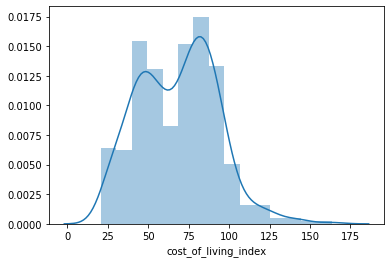

In [51]:
#Gráfico del 2015
life_cost_aux=life_cost.loc[life_cost['year']==2015] 
sns.distplot(life_cost_aux.cost_of_living_index) 

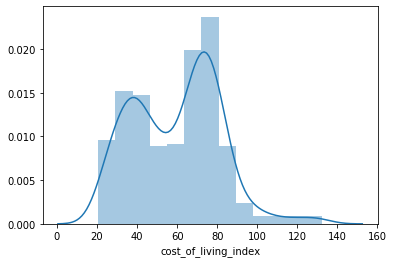

In [52]:
#Gráfico del 2016
life_cost_aux=life_cost.loc[life_cost['year']==2016] 
sns.distplot(life_cost_aux.cost_of_living_index)

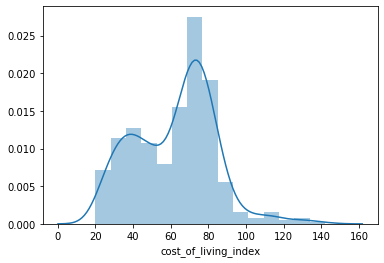

In [53]:
#Gráfico del 2017
life_cost_aux=life_cost.loc[life_cost['year']==2017]
sns.distplot(life_cost_aux.cost_of_living_index)

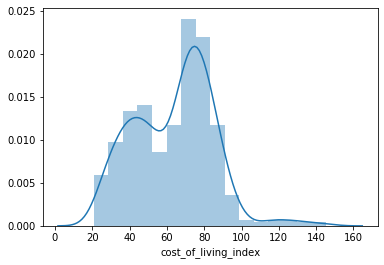

In [54]:
#Gráfico del 2018
life_cost_aux=life_cost.loc[life_cost['year']==2018]
sns.distplot(life_cost_aux.cost_of_living_index)

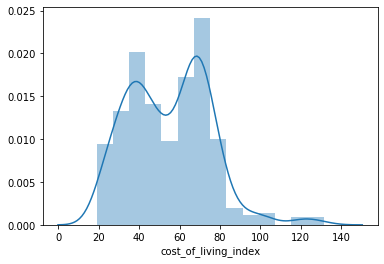

In [55]:
#Gráfico del 2019
life_cost_aux=life_cost.loc[life_cost['year']==2019]
sns.distplot(life_cost_aux.cost_of_living_index)

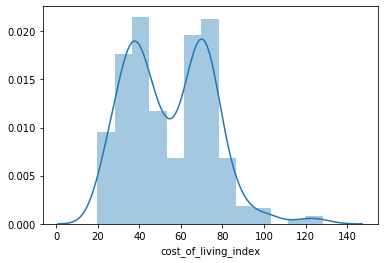

In [56]:
#Gráfico del 2020
life_cost_aux=life_cost.loc[life_cost['year']==2020]
sns.distplot(life_cost_aux.cost_of_living_index)

En todos los gráficos podemos ver que una gran parte de la data se concentra entre los 40% y 80%, teniendo incluso en el ultimo una distribución que parece ser 2 normales juntas en el año 2020. Esto implica que en las ciudades donde se realizó el estudio, es muy probable que el costo de la vida se aceque a los valores que se indicaron. Queriendo decir tambien que el costo de vivir en NY es bastante caro.

### Ejercicio 3.3 

Grafica el índice de restaurantes a través de los años para diez ciudades escogidas pseudo-aleatoriamente (variable `my_cities` de la celda siguiente) en un mismo gráfico. Recuerda escoger el tipo de gráfico adecuadamente.

¿Ves alguna relación? ¿Qué podrías decir del gráfico? ¿Por qué no graficar todas las ciudades en lugar de solo escoger algunas?

In [57]:
rol_seed = 201551544  # Escribe tu rol UTFSM sin número verificador
my_cities = life_cost["city"].drop_duplicates().sample(n=10, random_state=rol_seed).values

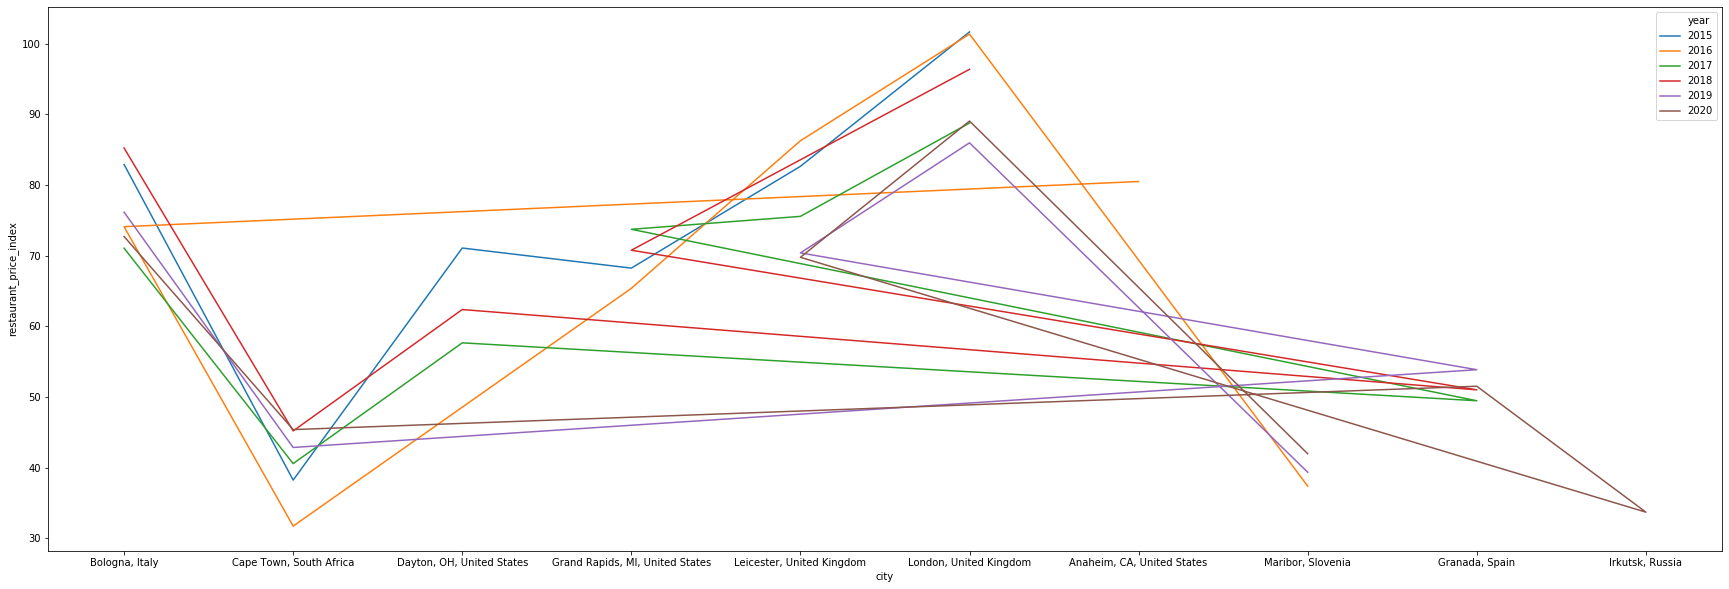

In [58]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,10 #se setteó así el tamaño para ver las ciudades

palette = sns.color_palette("tab10",6) #se elige una paleta que tenga colores distintivos.

sns.lineplot(
    x='city',
    y='restaurant_price_index',
    hue='year',# color por año
    data=life_cost[ life_cost['city'].isin(my_cities) ],
    ci = None,
    palette=palette
)

A pesar de que el gráfico no se vea muy representativo, se puede notar que la mayoría de las líneas están por debajo del 100, y bastante concentradas en el medio, lo que coincide con lo que se notó en la parte anterior con los histogramas. También se puede apreciar que la ciudad de Londres en el Reino Unido tiene los valores más cercanos a los de NYC. Resultado que es esperable considerando que es una importante y próspera capital europea.

### Ejercicio 3.4

Genera un mapa de calor tal que:

- El eje horizontal corresponda a cada uno de los índices.
- El eje vertical corresponda a cada una de las ciudades de `my_cities`.
- El color y valor en cada celda sea el promedio de los indicadores.
    - El valor de la celda debe tener solo dos decimales.

In [59]:
redable_index_names = {
    'cost_of_living_index': 'Costo de Vida',
    'rent_index': 'Alquiler',
    'cost_of_living_plus_rent_index': 'Costo de Vida + Alquiler',
    'groceries_index': 'Comestibles',
    'restaurant_price_index': 'Restaurantes',
    'local_purchasing_power_index': 'Poder Adquisitivo Local'
}

In [60]:
df_index = life_cost[ life_cost['city'].isin(my_cities) ] #se crea un df adicional con las ciudades de la semilla
df_index = df_index.rename( columns= redable_index_names ).reset_index().set_index('city').round(2) 
#se cambian los nombres de las columnas por los pedidos, se resetea el índice, se settea ciudad como el primero y 
#se redondea a la segunda cifra
group_index = df_index.groupby('city') #se agrupa por ciudad

In [61]:
df_index = group_index.agg( {'Costo de Vida':np.mean, 
                             'Alquiler':np.mean,
                            'Costo de Vida + Alquiler':np.mean, 
                             'Comestibles': np.mean,
                            'Restaurantes':np.mean,  
                             'Poder Adquisitivo Local':np.mean} #hasta esta línea se agregan los promedios indicados
                          ).reset_index().set_index('city').round(2) #acá se resetea el índice y se settea city como el primero
                                                                #y finalmente se redondea a la segunda cifra decimal con round

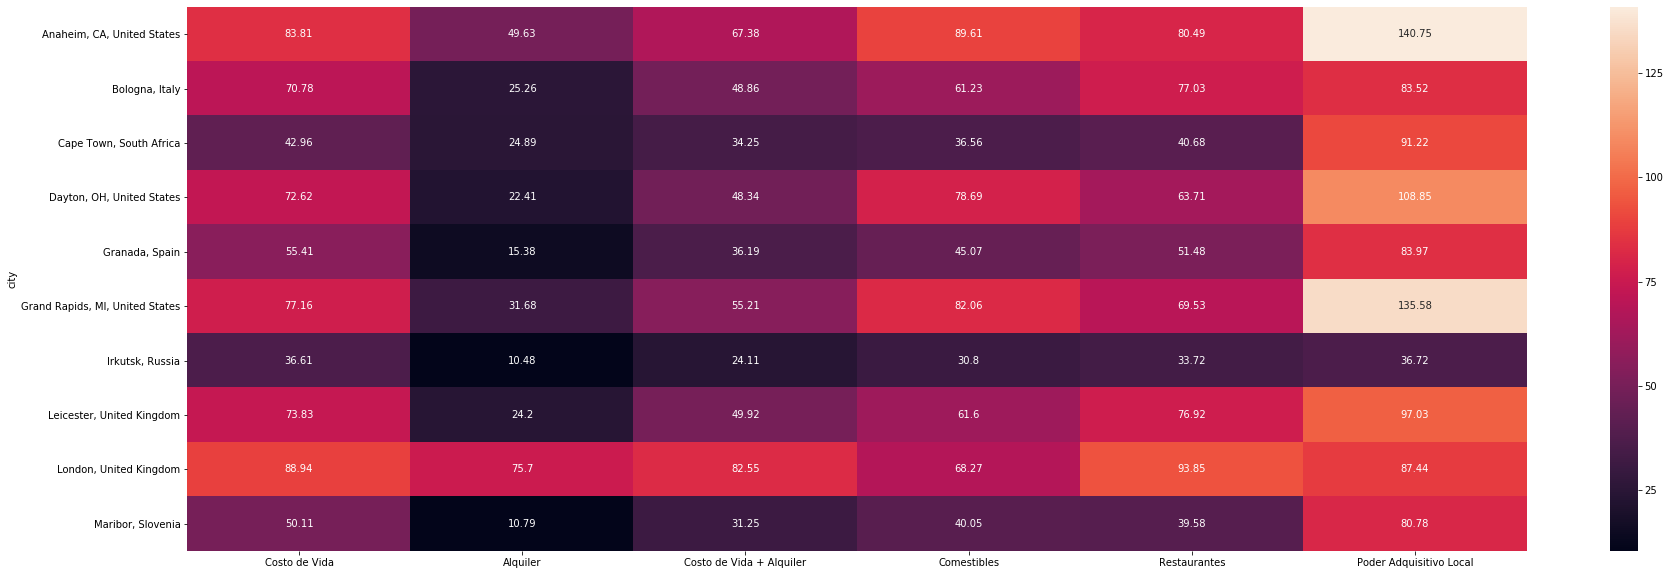

In [62]:
#Mapa de Calor
sns.heatmap(df_index , fmt = 'g', annot=True)

### Ejercicio 3.5

Primero, agregar la columna `country` al dataframe `life_cost` a partir de la columna `city`. Luego, realizar un scatter plot donde:

- Datos correspondientes al año 2020.
- El eje horizontal corresponda a el Índice de Comestibles.
- El eje vertical corresponda a el Poder Adquisitivo Local.
- El color corresponda al país.
- Debe contener solo 20 países que son escogidos pseudo-aleatoriamente.
    - Para ellos deber agregar la columna `country` al dataframe `life_cost`.
    - Ejecutar la celda sub-siguiente para generar el _np.array_ `my_countries`.
- Se debe utilizar un esquema de color distinto (_color scheme_ o _colormap_), puesto que hay 20 categorías. 
    - En `altair` utilizar el esquema `category20`. [Más información aquí](https://altair-viz.github.io/user_guide/customization.html?highlight=color%20map#color-schemes).
    - En `matplotlib` utilizar el esquema `tab20`. [Más información aquí](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).    
- En caso que los puntos del scatter plot se vean muy pequeños en relación al gráfico debes aumentar su tamaño.

In [63]:
 #acá se crea lo que se va a reemplazar
nuevo= life_cost['city'].str.split(', ', n=1, expand=True)
nuevo.columns=['city','country']
nuevo

city            country
0               Hamilton            Bermuda
1                 Geneva        Switzerland
2                Caracas          Venezuela
3                 Zurich        Switzerland
4                 Tromso             Norway
5                  Basel        Switzerland
6              Stavanger             Norway
7               Lausanne        Switzerland
8                 Darwin          Australia
9                   Bern        Switzerland
10             Trondheim             Norway
11          Saint Helier             Jersey
12                Luanda             Angola
13                  Oslo             Norway
14                Bergen             Norway
15                Lugano        Switzerland
16               Reading     United Kingdom
17              Aberdeen     United Kingdom
18         Fort McMurray             Canada
19                 Perth          Australia
20          Port Moresby   Papua New Guinea
21                London     United Kingdom
22            Copenhagen            Denmark
23             Reykjavik            Iceland
24              Honolulu  HI, United States
25                  Nice             France
26                 Arhus            Denmark
27                Sydney          Australia
28                Modena              Italy
29            Wellington        New Zealand
...                  ...                ...
2817               Thane              India
2818           Bangalore              India
2819            Tashkent         Uzbekistan
2820              Indore              India
2821                 Goa              India
2822           Ahmedabad              India
2823         Navi Mumbai              India
2824             Chennai              India
2825           Hyderabad              India
2826              Jaipur              India
2827            Vadodara              India
2828               Patna              India
2829            Guwahati              India
2830             Kolkata              India
2831              Rajkot              India
2832               Kochi              India
2833          Coimbatore              India
2834               Surat              India
2835           Mangalore              India
2836              Nagpur              India
2837              Lahore           Pakistan
2838              Bhopal              India
2839   Lucknow (Lakhnau)              India
2840              Mysore              India
2841         Bhubaneswar              India
2842             Karachi           Pakistan
2843           Islamabad           Pakistan
2844          Vijayawada              India
2845       Visakhapatnam              India
2846  Thiruvananthapuram              India

[2847 rows x 2 columns]

In [64]:
life_cost=life_cost.drop(columns='city') #se bota la columna city para reemplazar
life_cost=pd.concat([life_cost,nuevo], axis=1) #aqui se concatenan
life_cost.head()

year  rank  cost_of_living_index  rent_index  \
0  2015     1                163.55      120.02   
1  2015     2                145.18       81.46   
2  2015     3                141.41       60.46   
3  2015     4                141.06       66.39   
4  2015     5                131.45       55.80   

   cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                          142.28           191.71                  132.91   
1                          114.05           161.14                  141.23   
2                          101.86           155.16                  122.27   
3                          104.57           148.56                  146.90   
4                           94.48           127.72                  137.08   

   local_purchasing_power_index      city      country  
0                         69.79  Hamilton      Bermuda  
1                        130.21    Geneva  Switzerland  
2                          9.73   Caracas    Venezuela  
3                        133.91    Zurich  Switzerland  
4                        132.41    Tromso       Norway

In [65]:
my_countries = life_cost.query("year == 2020")["country"].drop_duplicates().sample(n=20, random_state=rol_seed).values
my_countries

array(['Romania', 'Oman', 'AK, United States', 'Jamaica', 'Peru',
       'MI, United States', 'WA, United States', 'Russia',
       'WI, United States', 'Suriname', 'MO, United States',
       'Dominican Republic', 'Turkey', 'CO, United States', 'Kazakhstan',
       'Ecuador', 'LA, United States', 'NV, United States', 'Kenya',
       'FL, United States'], dtype=object)

In [66]:
df_2020= life_cost[life_cost['year']==2020] #se crea el data frame del 2020
df_2020= df_2020[df_2020['country'].isin(my_countries)] #se restringe a los paises que tenemos en el arreglo de arriba

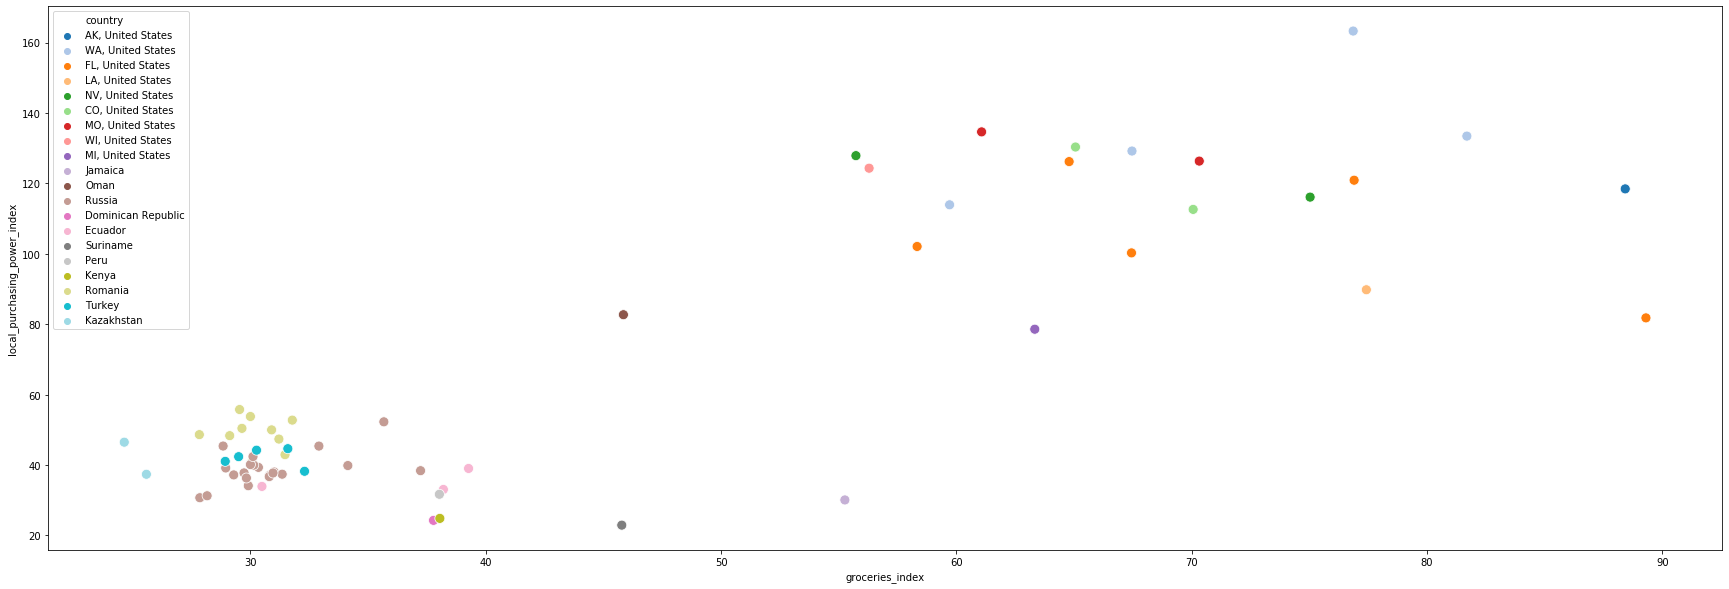

In [67]:
#Scatterplot
palette2= sns.color_palette('tab20')
sns.scatterplot( x = 'groceries_index',
                 y = 'local_purchasing_power_index',
                 hue = 'country',
                 data = df_2020,
                 palette = palette2,
                 s = 100 )

¿Qué comentarios puedes entregar al comparar los países seleccionados?

Pareciera que los datos podrían ajustarse linealmente en esta sección y no tener un error muy grande. Se puede notar especialmente en la nube de puntos cerca del (30,40) que son bastante cercanos los valores, y se denota también en la nube que es un poco más ampia cerca del (70,120) una interacción similar pero menos ajustada. Se podría a priori ver que existe una relación lineal más menos un ruido entre el índice de las comprar y el poder adquisitivo local, lo cual tiene sentido.

### Ejercicio 3.6

El siguiente ejercicio necesita de un conjunto de datos adicional, que relacione el país con el continente. A continuación se disponibiliza el dataframe `countries` con las columnas `country` y `continent`.

Agrega la columna `continent` al dataframe `life_cost` realizando un _merge_ con `countries`.

In [68]:
rename_countries_dict = {
    "Czechia": "Czech Republic",
    "Bosnia and Herzegovina": "Bosnia And Herzegovina",
    "Kosovo": "Kosovo (Disputed Territory)",
    "North Macedonia": "Macedonia",
    "Trinidad and Tobago": "Trinidad And Tobago"
}

countries = (
    pd.read_html("http://www.geonames.org/countries/", keep_default_na=False)[1]
    .rename(columns=lambda x: x.lower())
    .assign(country=lambda x: x["country"].replace(rename_countries_dict))
    .loc[:, ["country", "continent"]]
)
countries.head()

country continent
0               Andorra        EU
1  United Arab Emirates        AS
2           Afghanistan        AS
3   Antigua and Barbuda        NA
4              Anguilla        NA

In [69]:
life_cost_aux2=life_cost 
life_cost_aux2= pd.merge(life_cost, countries, on=['country']) 
#ocupamos la variable auxiliar para no cambiar el dataset original, se hace el merge entre la lista hecha de los paises
#y el life_cost sobre la columna country

life_cost_aux2.head()

year  rank  cost_of_living_index  rent_index  \
0  2015     1                163.55      120.02   
1  2016     1                132.32      120.87   
2  2017     1                141.84      113.35   
3  2018     1                145.43      110.87   
4  2015     2                145.18       81.46   

   cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                          142.28           191.71                  132.91   
1                          126.82           128.62                  120.35   
2                          128.19           131.79                  151.38   
3                          128.76           143.47                  158.75   
4                          114.05           161.14                  141.23   

   local_purchasing_power_index      city      country continent  
0                         69.79  Hamilton      Bermuda        NA  
1                        118.87  Hamilton      Bermuda        NA  
2                         96.54  Hamilton      Bermuda        NA  
3                        112.26  Hamilton      Bermuda        NA  
4                        130.21    Geneva  Switzerland        EU

In [70]:
#preprocesamiento para graficar
index = list(life_cost_aux2.columns[3:9])
indices = [ (index[i], index[j]) for i in range(0,6) for j in range(0,6) ]
index.append('continent')
data_grafico = life_cost_aux2[ life_cost_aux2['year']==2020 ]
data_grafico = data_grafico[index]

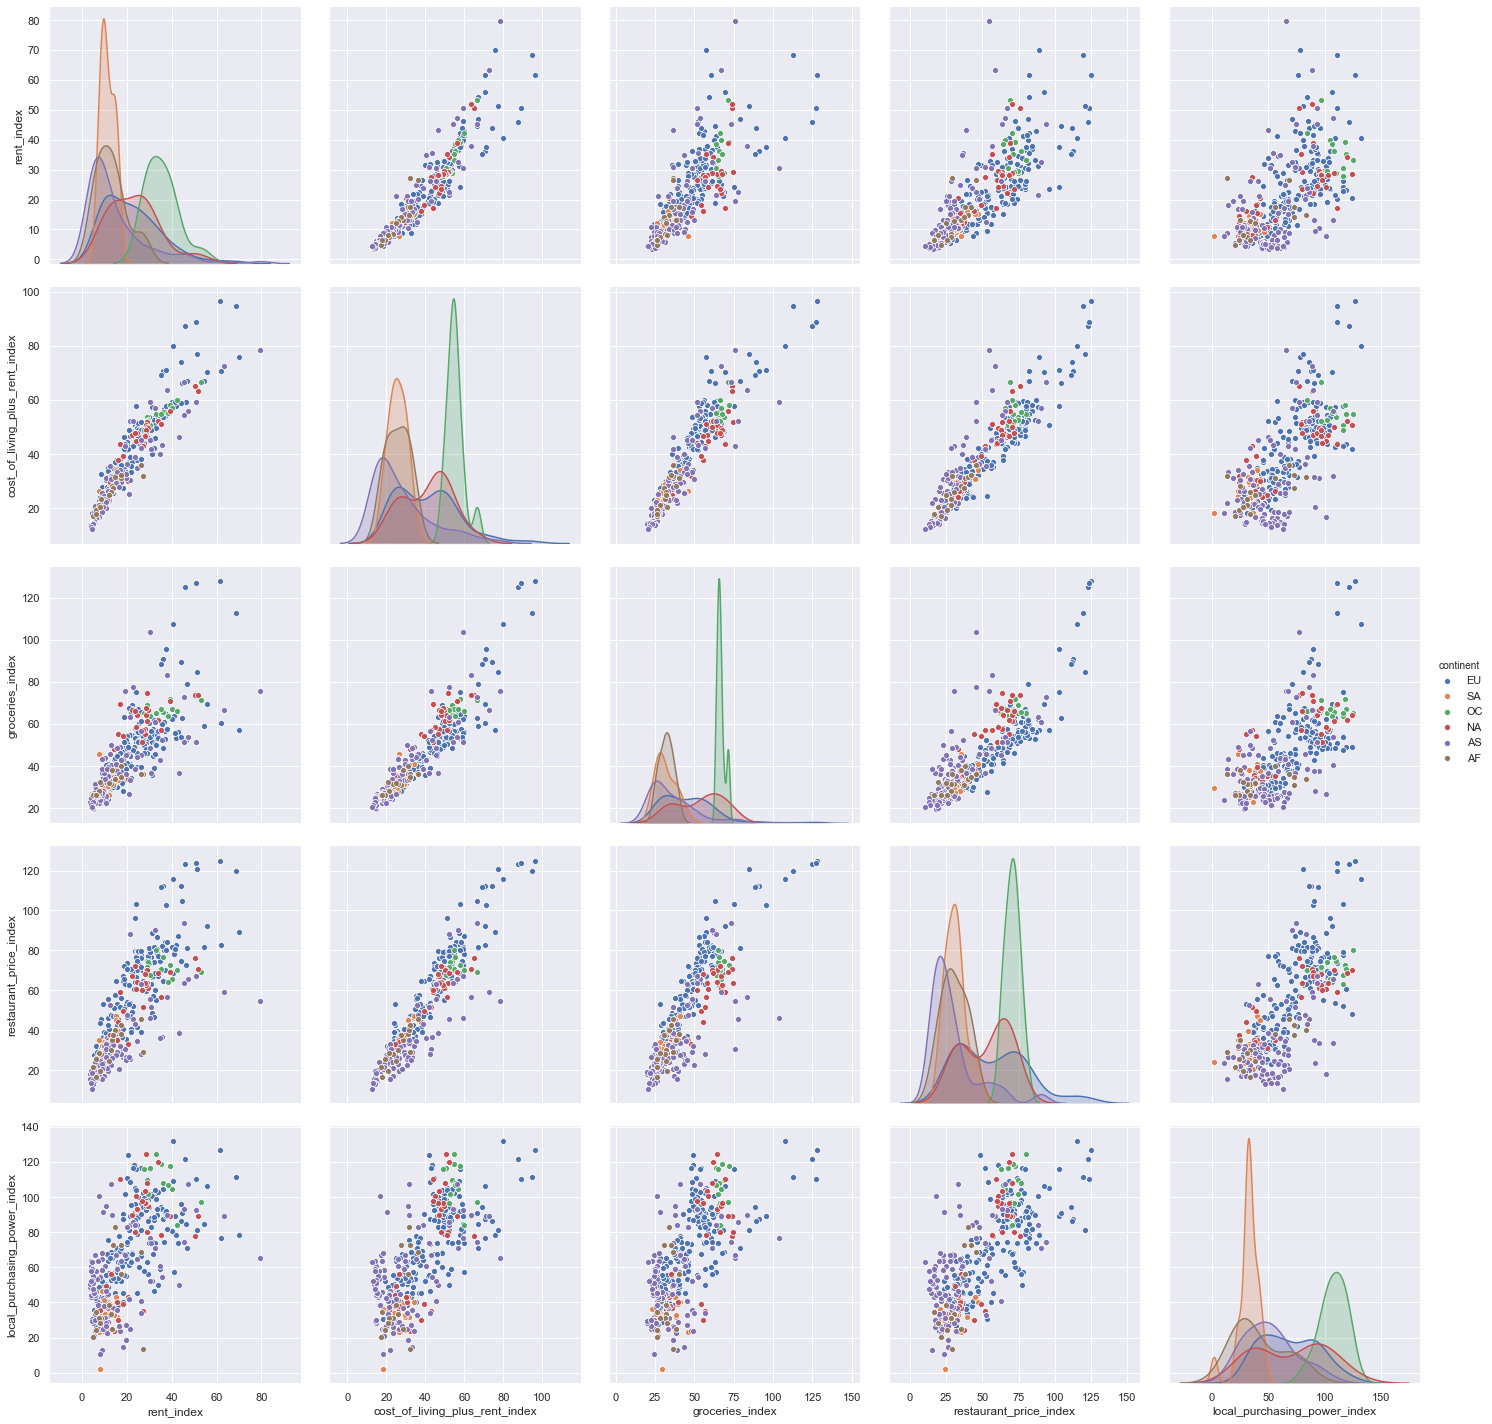

In [71]:
sns.set(rc={'figure.figsize':(30,30)})
sns.pairplot(data_grafico,
            kind = 'scatter',
            hue = 'continent',
            height=4)

A continuación genera un gráfico que posea 36 subgráficos, estos se generan realizando todas las permutaciones (con repetición) de dos índices. 

Cada sub-gráfico:
- Debe corresponder solo al año 2020.
- Debe ser un scatter plot.
- Los ejes horizontal y vertical corresponden al par de índices de la permutación
- El color de cada punto se corresponde al continente.
- La opacidad de cada punto debe ser `0.3`.

In [72]:
lifenew=life_cost_aux2.copy()
lifenew= lifenew[lifenew['year']==2020] #se crea este df auxiliar en el año pedido

In [73]:
lifenew.pop('year') #se borran las columnas que no aportan
lifenew.pop('rank')
lifenew.head()

cost_of_living_index  rent_index  cost_of_living_plus_rent_index  \
36                128.29       61.66                           96.42   
37                125.54       45.76                           87.38   
38                124.02       50.64                           88.92   
39                118.98       68.47                           94.82   
40                116.03       40.52                           79.91   

    groceries_index  restaurant_price_index  local_purchasing_power_index  \
36           127.96                  124.73                        126.90   
37           124.99                  123.11                        121.47   
38           127.26                  123.61                        110.52   
39           112.88                  119.58                        111.16   
40           107.58                  115.56                        131.89   

        city      country continent  
36    Zurich  Switzerland        EU  
37     Basel  Switzerland        EU  
38  Lausanne  Switzerland        EU  
39    Geneva  Switzerland        EU  
40      Bern  Switzerland        EU

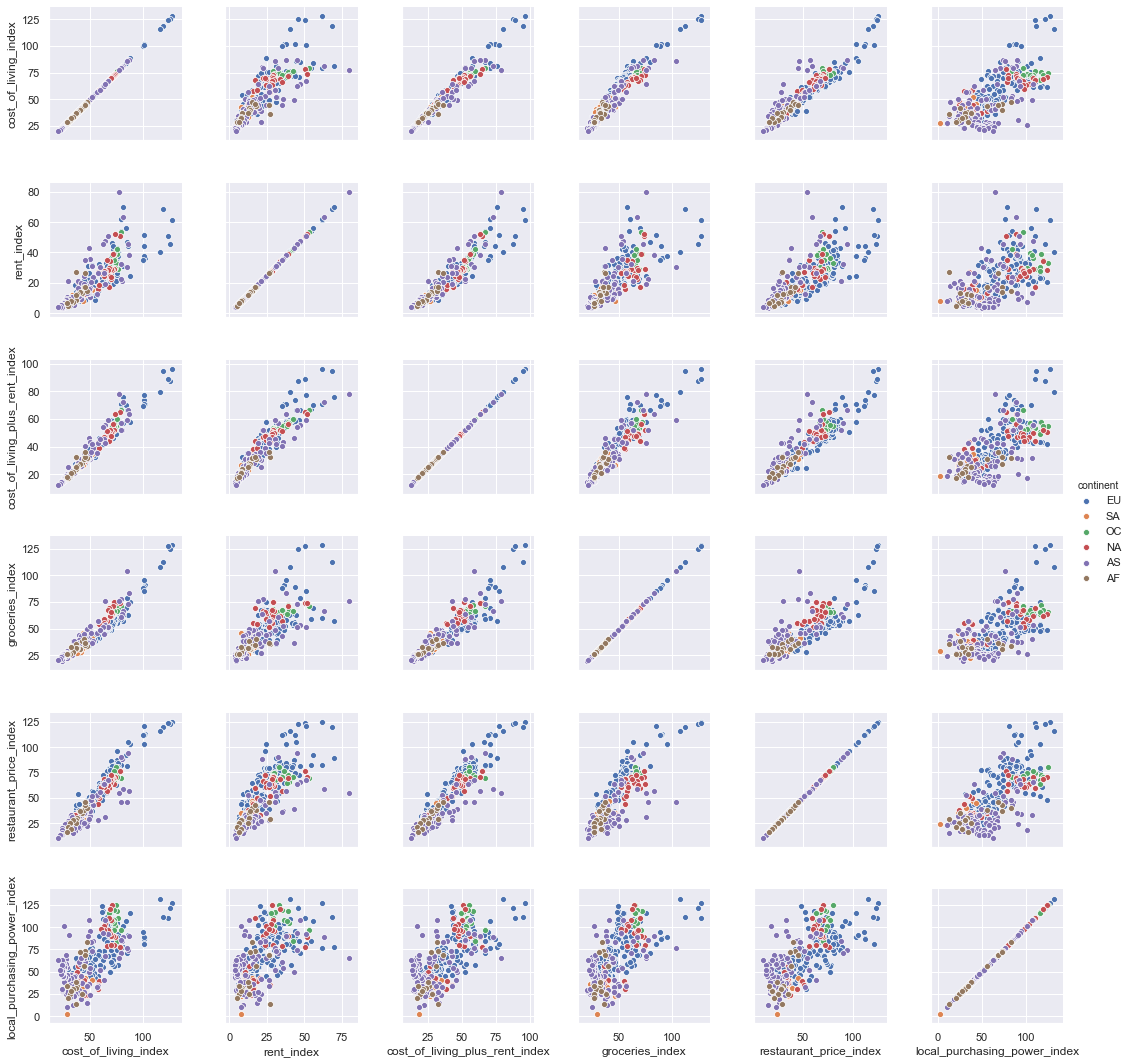

In [74]:
#Scatterplots
fig= sns.pairplot(lifenew, diag_kind=None, hue='continent') 